## Skills

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl as xl
# import os
# import pathlib
from pathlib import Path

import panel as pn
import hvplot.pandas
import holoviews as hv

import bokeh
import jupyter_bokeh

In [2]:
def get_filepath(curr_dir, folder, filename):
    """Returns the PosixPath path from the PosixPath under pathlib package.
    
    Args:
        curr_dir (Path): The current working directory as a PosixPath variable.
        folder (str): The folder containing the filename
        filename (str): The filename

    Returns:
        PosixPath:  Absolute path

    >>> get_filepath(Path.cwd(), "project_data/2019-29", "aggregate-economy-tables.xlsx")
    PosixPath('/Users/keshavelango/Desktop/Fall 2024/Big Data Algorithms/Project/project_data/2019-29/aggregate-economy-tables.xlsx')
    """
    path = curr_dir / folder / filename
    return path.resolve()

In [3]:
cwd = Path.cwd()
cwd

PosixPath('/Users/keshavelango/Documents/GitHub/big-data-algo/labour-latest/LabourData/notebooks')

In [4]:
path_2023_33 = "project_data/2023-33"

In [5]:
skills_filename = "skills.xlsx"

In [6]:
skills_filename_fn = get_filepath(cwd, path_2023_33, skills_filename)
skills_filename_fn

PosixPath('/Users/keshavelango/Documents/GitHub/big-data-algo/labour-latest/LabourData/notebooks/project_data/2023-33/skills.xlsx')

In [7]:
skills_sheet = pd.ExcelFile(skills_filename_fn)

In [8]:
skills_sheet_names = skills_sheet.sheet_names

skills_sheet_dfs = {}

for sheet_name in skills_sheet_names:
    skills_sheet_dfs[sheet_name] = pd.read_excel(skills_filename_fn, sheet_name=sheet_name)

In [9]:
skills_sheet_dfs.keys()

dict_keys(['Index', 'Table 6.1', 'Table 6.2', 'Table 6.3', 'Table 6.4', 'Table 6.5'])

In [10]:
for key in list(skills_sheet_dfs.keys())[1:]:
    if key != 'Table 6.2':
        skills_sheet_dfs[key].columns = skills_sheet_dfs[key].iloc[0,:].str.strip()
        # skills_sheet_dfs[key].columns
        skills_sheet_dfs[key] = skills_sheet_dfs[key].iloc[1:]
        drop_theshold = int(len(skills_sheet_dfs[key]) * 0.25)
        skills_sheet_dfs[key] = skills_sheet_dfs[key].dropna(thresh=drop_theshold)
        skills_sheet_dfs[key] = skills_sheet_dfs[key].reset_index(drop=True)

In [11]:
skills_sheet_dfs['Table 6.2']

,Table 6.2 Skills data by detailed occupation and 2023–33 employment projections (Employment in thousands),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,2023 National Employment Matrix title,2023 National Employment Matrix code,"Employment, 2023","Employment, 2033","Employment change, numeric, 2023–33","Employment change, percent, 2023–33","Median annual wage, dollars, 2023[1]",Typical education needed for entry,Adaptability,Computers and information technology,...,Interpersonal,Leadership,Mathematics,Mechanical,Physical strength and stamina,Problem solving and decision making,Project management,Science,Speaking and listening,Writing and reading
1,"Total, all occupations",00-0000,167849.8,174589,6739.2,4,48060,—,3.8,3,...,3.5,3.2,2.6,1.9,2.2,3.5,2.7,1.7,3.2,3.3
2,Chief executives,11-1011,313.9,331.1,17.2,5.5,206680,Bachelor's degree,4.2,3.7,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
3,General and operations managers,11-1021,3630.1,3840.5,210.4,5.8,101280,Bachelor's degree,4.1,3.5,...,3.7,4,3,1.7,1.7,4.1,3.6,1.7,3.5,3.8
4,Legislators[2],11-1031,33.7,35,1.4,4.1,47290,Bachelor's degree,4.2,3.7,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,[1] Data are from the Occupational Employment ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,[2] Skills information from similar O*NET-SOC ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,Note: Skills scores range from 1.0 (Not import...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838,Note: Data is unavailable for values denoted w...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
skills_sheet_dfs['Table 6.2'] = skills_sheet_dfs['Table 6.2'].iloc[:-6]
skills_sheet_dfs['Table 6.2'].tail(10)

,Table 6.2 Skills data by detailed occupation and 2023–33 employment projections (Employment in thousands),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
824,"Laborers and freight, stock, and material mo...",53-7062,3004.8,3130.6,125.7,4.2,37660,No formal educational credential,3.2,2.1,...,2.7,2.4,2.1,2.5,3.2,3.1,1.9,1.2,2.5,2.7
825,Machine feeders and offbearers,53-7063,43.8,38.2,-5.6,-12.7,39250,No formal educational credential,2.9,2,...,2.8,2.5,2.4,2.3,2.7,2.5,2,1.4,2.7,2.5
826,"Packers and packagers, hand",53-7064,641.3,614.3,-26.9,-4.2,34830,No formal educational credential,3.4,2.6,...,3,3.1,2.2,2.1,2.8,2.9,2.3,1.6,2.5,2.3
827,Stockers and order fillers,53-7065,2864.7,3033.3,168.6,5.9,36390,High school diploma or equivalent,3.2,2.7,...,3.1,2.8,2.2,1.8,3,3,2.3,1.4,2.9,2.7
828,Gas compressor and gas pumping station opera...,53-7071,4.5,4.5,0.1,1.2,61870,High school diploma or equivalent,3.9,3.6,...,3,3.2,2.5,3.4,2.6,3.5,2.6,2.6,2.8,3
829,"Pump operators, except wellhead pumpers",53-7072,11.7,12.3,0.6,5,54690,High school diploma or equivalent,3.2,2.8,...,2.6,2.8,2.8,3.1,2.9,3.5,3,2,2.8,3.2
830,Wellhead pumpers,53-7073,19.4,19,-0.4,-2,71830,High school diploma or equivalent,3.5,3.1,...,2.9,3.1,2.4,3.2,2.8,3.6,2.7,2,2.6,2.8
831,Refuse and recyclable material collectors,53-7081,148.4,151.9,3.5,2.3,45760,No formal educational credential,2.7,1.6,...,2.5,2.1,1.3,2.6,3,2.7,1.5,1.2,2.5,2.3
832,"Tank car, truck, and ship loaders",53-7121,12.7,13.2,0.5,3.9,58620,No formal educational credential,3.6,3,...,3,3.2,2.5,2.9,3.3,3.5,2.8,1.8,2.8,3.1
833,"Material moving workers, all other[2]",53-7199,26.5,27.6,1.2,4.4,40310,No formal educational credential,3.2,2.4,...,2.9,2.7,2.2,2.2,3,3,2.2,1.4,2.6,2.6


In [13]:
skills_sheet_dfs['Table 6.2'].columns = skills_sheet_dfs['Table 6.2'].iloc[0,:].str.strip()
skills_sheet_dfs['Table 6.2'] = skills_sheet_dfs['Table 6.2'].iloc[1:]
skills_sheet_dfs['Table 6.2'] = skills_sheet_dfs['Table 6.2'].reset_index(drop=True)
skills_sheet_dfs['Table 6.2']

,2023 National Employment Matrix title,2023 National Employment Matrix code,"Employment, 2023","Employment, 2033","Employment change, numeric, 2023–33","Employment change, percent, 2023–33","Median annual wage, dollars, 2023[1]",Typical education needed for entry,Adaptability,Computers and information technology,...,Interpersonal,Leadership,Mathematics,Mechanical,Physical strength and stamina,Problem solving and decision making,Project management,Science,Speaking and listening,Writing and reading
0,"Total, all occupations",00-0000,167849.8,174589,6739.2,4,48060,—,3.8,3,...,3.5,3.2,2.6,1.9,2.2,3.5,2.7,1.7,3.2,3.3
1,Chief executives,11-1011,313.9,331.1,17.2,5.5,206680,Bachelor's degree,4.2,3.7,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
2,General and operations managers,11-1021,3630.1,3840.5,210.4,5.8,101280,Bachelor's degree,4.1,3.5,...,3.7,4,3,1.7,1.7,4.1,3.6,1.7,3.5,3.8
3,Legislators[2],11-1031,33.7,35,1.4,4.1,47290,Bachelor's degree,4.2,3.7,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
4,Advertising and promotions managers,11-2011,22.2,21.7,-0.6,-2.6,131870,Bachelor's degree,4,3.6,...,3.5,3.2,3,1.3,1.3,3.8,3.1,1.4,3.9,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,"Pump operators, except wellhead pumpers",53-7072,11.7,12.3,0.6,5,54690,High school diploma or equivalent,3.2,2.8,...,2.6,2.8,2.8,3.1,2.9,3.5,3,2,2.8,3.2
829,Wellhead pumpers,53-7073,19.4,19,-0.4,-2,71830,High school diploma or equivalent,3.5,3.1,...,2.9,3.1,2.4,3.2,2.8,3.6,2.7,2,2.6,2.8
830,Refuse and recyclable material collectors,53-7081,148.4,151.9,3.5,2.3,45760,No formal educational credential,2.7,1.6,...,2.5,2.1,1.3,2.6,3,2.7,1.5,1.2,2.5,2.3
831,"Tank car, truck, and ship loaders",53-7121,12.7,13.2,0.5,3.9,58620,No formal educational credential,3.6,3,...,3,3.2,2.5,2.9,3.3,3.5,2.8,1.8,2.8,3.1


In [14]:
skills_sheet_dfs['Table 6.3']

,2023 National Employment Matrix title,2023 National Employment Matrix code,"Employment, 2023","Employment, 2033","Employment change, numeric, 2023–33","Employment change, percent, 2023–33",Top highest skill category,Second highest skill category,Third highest skill category
0,"Total, all occupations",00-0000,167849.8,174589,6739.2,4,Adaptability,Detail oriented,Interpersonal
1,Wind turbine service technicians,49-9081,11.4,18.2,6.8,60.1,Detail oriented,Mechanical,Adaptability
2,Solar photovoltaic installers,47-2231,25,37,12,48,Detail oriented,Problem solving and decision making,Adaptability
3,Nurse practitioners,29-1171,292.5,427.9,135.5,46.3,Adaptability,Interpersonal,Problem solving and decision making
4,Data scientists[1],15-2051,202.9,276,73.1,36,Mathematics,Writing and reading,Computers and information technology
5,Information security analysts,15-1212,180.7,239.8,59.1,32.7,Computers and information technology,Adaptability,Writing and reading
6,Medical and health services managers,11-9111,562.7,723.3,160.6,28.5,Adaptability,Leadership,Critical and analytical thinking
7,Physician assistants,29-1071,153.4,197.1,43.7,28.5,Adaptability,Interpersonal,Detail oriented
8,Computer and information research scientists,15-1221,36.6,46,9.4,25.6,Computers and information technology,Critical and analytical thinking,Problem solving and decision making
9,Physical therapist assistants,31-2021,108.5,136,27.5,25.4,Interpersonal,Adaptability,Problem solving and decision making


In [15]:
skills_sheet_dfs['Table 6.2'].columns

Index(['2023 National Employment Matrix title',
       '2023 National Employment Matrix code', 'Employment, 2023',
       'Employment, 2033', 'Employment change, numeric, 2023–33',
       'Employment change, percent, 2023–33',
       'Median annual wage, dollars, 2023[1]',
       'Typical education needed for entry', 'Adaptability',
       'Computers and information technology', 'Creativity and innovation',
       'Critical and analytical thinking', 'Customer service',
       'Detail oriented', 'Fine motor', 'Interpersonal', 'Leadership',
       'Mathematics', 'Mechanical', 'Physical strength and stamina',
       'Problem solving and decision making', 'Project management', 'Science',
       'Speaking and listening', 'Writing and reading'],
      dtype='object', name=0)

In [16]:
skills_sheet_dfs['Table 6.2'].head()

,2023 National Employment Matrix title,2023 National Employment Matrix code,"Employment, 2023","Employment, 2033","Employment change, numeric, 2023–33","Employment change, percent, 2023–33","Median annual wage, dollars, 2023[1]",Typical education needed for entry,Adaptability,Computers and information technology,...,Interpersonal,Leadership,Mathematics,Mechanical,Physical strength and stamina,Problem solving and decision making,Project management,Science,Speaking and listening,Writing and reading
0,"Total, all occupations",00-0000,167849.8,174589,6739.2,4,48060,—,3.8,3,...,3.5,3.2,2.6,1.9,2.2,3.5,2.7,1.7,3.2,3.3
1,Chief executives,11-1011,313.9,331.1,17.2,5.5,206680,Bachelor's degree,4.2,3.7,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
2,General and operations managers,11-1021,3630.1,3840.5,210.4,5.8,101280,Bachelor's degree,4.1,3.5,...,3.7,4,3,1.7,1.7,4.1,3.6,1.7,3.5,3.8
3,Legislators[2],11-1031,33.7,35,1.4,4.1,47290,Bachelor's degree,4.2,3.7,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
4,Advertising and promotions managers,11-2011,22.2,21.7,-0.6,-2.6,131870,Bachelor's degree,4,3.6,...,3.5,3.2,3,1.3,1.3,3.8,3.1,1.4,3.9,3.7


In [17]:
skills_sheet_dfs['Table 6.2'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   2023 National Employment Matrix title  833 non-null    object
 1   2023 National Employment Matrix code   833 non-null    object
 2   Employment, 2023                       833 non-null    object
 3   Employment, 2033                       833 non-null    object
 4   Employment change, numeric, 2023–33    833 non-null    object
 5   Employment change, percent, 2023–33    833 non-null    object
 6   Median annual wage, dollars, 2023[1]   833 non-null    object
 7   Typical education needed for entry     833 non-null    object
 8   Adaptability                           833 non-null    object
 9   Computers and information technology   833 non-null    object
 10  Creativity and innovation              833 non-null    object
 11  Critical and analyt

In [18]:
skills_sheet_dfs['Table 6.2'].loc[:,'Typical education needed for entry'].value_counts()

Typical education needed for entry
High school diploma or equivalent    327
Bachelor's degree                    178
No formal educational credential     108
Doctoral or professional degree       73
Postsecondary nondegree award         51
Associate's degree                    48
Master's degree                       40
Some college, no degree                7
—                                      1
Name: count, dtype: int64

In [19]:
skills_sheet_dfs['Table 6.2'].isna().sum()

0
2023 National Employment Matrix title    0
2023 National Employment Matrix code     0
Employment, 2023                         0
Employment, 2033                         0
Employment change, numeric, 2023–33      0
Employment change, percent, 2023–33      0
Median annual wage, dollars, 2023[1]     0
Typical education needed for entry       0
Adaptability                             0
Computers and information technology     0
Creativity and innovation                0
Critical and analytical thinking         0
Customer service                         0
Detail oriented                          0
Fine motor                               0
Interpersonal                            0
Leadership                               0
Mathematics                              0
Mechanical                               0
Physical strength and stamina            0
Problem solving and decision making      0
Project management                       0
Science                                  0
Speaking 

In [20]:
skills_sheet_dfs['Table 6.2'] = skills_sheet_dfs['Table 6.2'].iloc[1:,:]
skills_sheet_dfs['Table 6.2']

,2023 National Employment Matrix title,2023 National Employment Matrix code,"Employment, 2023","Employment, 2033","Employment change, numeric, 2023–33","Employment change, percent, 2023–33","Median annual wage, dollars, 2023[1]",Typical education needed for entry,Adaptability,Computers and information technology,...,Interpersonal,Leadership,Mathematics,Mechanical,Physical strength and stamina,Problem solving and decision making,Project management,Science,Speaking and listening,Writing and reading
1,Chief executives,11-1011,313.9,331.1,17.2,5.5,206680,Bachelor's degree,4.2,3.7,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
2,General and operations managers,11-1021,3630.1,3840.5,210.4,5.8,101280,Bachelor's degree,4.1,3.5,...,3.7,4,3,1.7,1.7,4.1,3.6,1.7,3.5,3.8
3,Legislators[2],11-1031,33.7,35,1.4,4.1,47290,Bachelor's degree,4.2,3.7,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
4,Advertising and promotions managers,11-2011,22.2,21.7,-0.6,-2.6,131870,Bachelor's degree,4,3.6,...,3.5,3.2,3,1.3,1.3,3.8,3.1,1.4,3.9,3.7
5,Marketing managers,11-2021,389.1,420.8,31.7,8.2,157620,Bachelor's degree,4,3.6,...,3.5,3.8,3.1,1.1,1.3,4,3.3,1.3,3.8,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,"Pump operators, except wellhead pumpers",53-7072,11.7,12.3,0.6,5,54690,High school diploma or equivalent,3.2,2.8,...,2.6,2.8,2.8,3.1,2.9,3.5,3,2,2.8,3.2
829,Wellhead pumpers,53-7073,19.4,19,-0.4,-2,71830,High school diploma or equivalent,3.5,3.1,...,2.9,3.1,2.4,3.2,2.8,3.6,2.7,2,2.6,2.8
830,Refuse and recyclable material collectors,53-7081,148.4,151.9,3.5,2.3,45760,No formal educational credential,2.7,1.6,...,2.5,2.1,1.3,2.6,3,2.7,1.5,1.2,2.5,2.3
831,"Tank car, truck, and ship loaders",53-7121,12.7,13.2,0.5,3.9,58620,No formal educational credential,3.6,3,...,3,3.2,2.5,2.9,3.3,3.5,2.8,1.8,2.8,3.1


In [21]:
education_dummies = pd.get_dummies(skills_sheet_dfs['Table 6.2'].loc[:,'Typical education needed for entry'])
education_dummies

,Associate's degree,Bachelor's degree,Doctoral or professional degree,High school diploma or equivalent,Master's degree,No formal educational credential,Postsecondary nondegree award,"Some college, no degree"
1,False,True,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
828,False,False,False,True,False,False,False,False
829,False,False,False,True,False,False,False,False
830,False,False,False,False,False,True,False,False
831,False,False,False,False,False,True,False,False


In [22]:
skills_sheet_dfs['Table 6.2'].columns

Index(['2023 National Employment Matrix title',
       '2023 National Employment Matrix code', 'Employment, 2023',
       'Employment, 2033', 'Employment change, numeric, 2023–33',
       'Employment change, percent, 2023–33',
       'Median annual wage, dollars, 2023[1]',
       'Typical education needed for entry', 'Adaptability',
       'Computers and information technology', 'Creativity and innovation',
       'Critical and analytical thinking', 'Customer service',
       'Detail oriented', 'Fine motor', 'Interpersonal', 'Leadership',
       'Mathematics', 'Mechanical', 'Physical strength and stamina',
       'Problem solving and decision making', 'Project management', 'Science',
       'Speaking and listening', 'Writing and reading'],
      dtype='object', name=0)

In [23]:
data_for_sklearn  = skills_sheet_dfs['Table 6.2'].drop(['2023 National Employment Matrix code','Employment change, numeric, 2023–33','Employment change, percent, 2023–33','Typical education needed for entry'], axis=1)
data_for_sklearn

,2023 National Employment Matrix title,"Employment, 2023","Employment, 2033","Median annual wage, dollars, 2023[1]",Adaptability,Computers and information technology,Creativity and innovation,Critical and analytical thinking,Customer service,Detail oriented,...,Interpersonal,Leadership,Mathematics,Mechanical,Physical strength and stamina,Problem solving and decision making,Project management,Science,Speaking and listening,Writing and reading
1,Chief executives,313.9,331.1,206680,4.2,3.7,3.5,4.1,3.9,3.7,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
2,General and operations managers,3630.1,3840.5,101280,4.1,3.5,3.1,3.6,3.6,3.6,...,3.7,4,3,1.7,1.7,4.1,3.6,1.7,3.5,3.8
3,Legislators[2],33.7,35,47290,4.2,3.7,3.5,4.1,3.9,3.7,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
4,Advertising and promotions managers,22.2,21.7,131870,4,3.6,3.5,3.5,3.5,3.5,...,3.5,3.2,3,1.3,1.3,3.8,3.1,1.4,3.9,3.7
5,Marketing managers,389.1,420.8,157620,4,3.6,3.4,3.7,3.5,3.4,...,3.5,3.8,3.1,1.1,1.3,4,3.3,1.3,3.8,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,"Pump operators, except wellhead pumpers",11.7,12.3,54690,3.2,2.8,2.3,2.9,2.2,3.5,...,2.6,2.8,2.8,3.1,2.9,3.5,3,2,2.8,3.2
829,Wellhead pumpers,19.4,19,71830,3.5,3.1,2.5,2.9,2.5,3.6,...,2.9,3.1,2.4,3.2,2.8,3.6,2.7,2,2.6,2.8
830,Refuse and recyclable material collectors,148.4,151.9,45760,2.7,1.6,1.6,2.1,2.3,3.1,...,2.5,2.1,1.3,2.6,3,2.7,1.5,1.2,2.5,2.3
831,"Tank car, truck, and ship loaders",12.7,13.2,58620,3.6,3,2.5,2.8,2.6,4.2,...,3,3.2,2.5,2.9,3.3,3.5,2.8,1.8,2.8,3.1


In [24]:
data_for_sklearn_final = pd.concat((data_for_sklearn, education_dummies), axis = 1)
data_for_sklearn_final = data_for_sklearn_final.reset_index(drop=True)
data_for_sklearn_final

,2023 National Employment Matrix title,"Employment, 2023","Employment, 2033","Median annual wage, dollars, 2023[1]",Adaptability,Computers and information technology,Creativity and innovation,Critical and analytical thinking,Customer service,Detail oriented,...,Speaking and listening,Writing and reading,Associate's degree,Bachelor's degree,Doctoral or professional degree,High school diploma or equivalent,Master's degree,No formal educational credential,Postsecondary nondegree award,"Some college, no degree"
0,Chief executives,313.9,331.1,206680,4.2,3.7,3.5,4.1,3.9,3.7,...,4,4.2,False,True,False,False,False,False,False,False
1,General and operations managers,3630.1,3840.5,101280,4.1,3.5,3.1,3.6,3.6,3.6,...,3.5,3.8,False,True,False,False,False,False,False,False
2,Legislators[2],33.7,35,47290,4.2,3.7,3.5,4.1,3.9,3.7,...,4,4.2,False,True,False,False,False,False,False,False
3,Advertising and promotions managers,22.2,21.7,131870,4,3.6,3.5,3.5,3.5,3.5,...,3.9,3.7,False,True,False,False,False,False,False,False
4,Marketing managers,389.1,420.8,157620,4,3.6,3.4,3.7,3.5,3.4,...,3.8,3.7,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,"Pump operators, except wellhead pumpers",11.7,12.3,54690,3.2,2.8,2.3,2.9,2.2,3.5,...,2.8,3.2,False,False,False,True,False,False,False,False
828,Wellhead pumpers,19.4,19,71830,3.5,3.1,2.5,2.9,2.5,3.6,...,2.6,2.8,False,False,False,True,False,False,False,False
829,Refuse and recyclable material collectors,148.4,151.9,45760,2.7,1.6,1.6,2.1,2.3,3.1,...,2.5,2.3,False,False,False,False,False,True,False,False
830,"Tank car, truck, and ship loaders",12.7,13.2,58620,3.6,3,2.5,2.8,2.6,4.2,...,2.8,3.1,False,False,False,False,False,True,False,False


In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data_for_sklearn_final['Employment_Title_encoded'] = label_encoder.fit_transform(data_for_sklearn_final['2023 National Employment Matrix title'])
data_for_sklearn_final

,2023 National Employment Matrix title,"Employment, 2023","Employment, 2033","Median annual wage, dollars, 2023[1]",Adaptability,Computers and information technology,Creativity and innovation,Critical and analytical thinking,Customer service,Detail oriented,...,Writing and reading,Associate's degree,Bachelor's degree,Doctoral or professional degree,High school diploma or equivalent,Master's degree,No formal educational credential,Postsecondary nondegree award,"Some college, no degree",Employment_Title_encoded
0,Chief executives,313.9,331.1,206680,4.2,3.7,3.5,4.1,3.9,3.7,...,4.2,False,True,False,False,False,False,False,False,111
1,General and operations managers,3630.1,3840.5,101280,4.1,3.5,3.1,3.6,3.6,3.6,...,3.8,False,True,False,False,False,False,False,False,359
2,Legislators[2],33.7,35,47290,4.2,3.7,3.5,4.1,3.9,3.7,...,4.2,False,True,False,False,False,False,False,False,446
3,Advertising and promotions managers,22.2,21.7,131870,4,3.6,3.5,3.5,3.5,3.5,...,3.7,False,True,False,False,False,False,False,False,8
4,Marketing managers,389.1,420.8,157620,4,3.6,3.4,3.7,3.5,3.4,...,3.7,False,True,False,False,False,False,False,False,482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,"Pump operators, except wellhead pumpers",11.7,12.3,54690,3.2,2.8,2.3,2.9,2.2,3.5,...,3.2,False,False,False,True,False,False,False,False,661
828,Wellhead pumpers,19.4,19,71830,3.5,3.1,2.5,2.9,2.5,3.6,...,2.8,False,False,False,True,False,False,False,False,825
829,Refuse and recyclable material collectors,148.4,151.9,45760,2.7,1.6,1.6,2.1,2.3,3.1,...,2.3,False,False,False,False,False,True,False,False,681
830,"Tank car, truck, and ship loaders",12.7,13.2,58620,3.6,3,2.5,2.8,2.6,4.2,...,3.1,False,False,False,False,False,True,False,False,769


In [26]:
data_for_sklearn_final.loc[:,'Median annual wage, dollars, 2023[1]'] = data_for_sklearn_final.loc[:,'Median annual wage, dollars, 2023[1]'].astype(str)

data_for_sklearn_final.loc[:,'Median annual wage, dollars, 2023[1]'] = data_for_sklearn_final.loc[:,'Median annual wage, dollars, 2023[1]'].map(
    lambda x: x.replace('—', '0').replace('>=239,200', '239200')
)
data_for_sklearn_final.loc[:,'Median annual wage, dollars, 2023[1]'] = data_for_sklearn_final.loc[:,'Median annual wage, dollars, 2023[1]'].astype(object)
data_for_sklearn_final

,2023 National Employment Matrix title,"Employment, 2023","Employment, 2033","Median annual wage, dollars, 2023[1]",Adaptability,Computers and information technology,Creativity and innovation,Critical and analytical thinking,Customer service,Detail oriented,...,Writing and reading,Associate's degree,Bachelor's degree,Doctoral or professional degree,High school diploma or equivalent,Master's degree,No formal educational credential,Postsecondary nondegree award,"Some college, no degree",Employment_Title_encoded
0,Chief executives,313.9,331.1,206680,4.2,3.7,3.5,4.1,3.9,3.7,...,4.2,False,True,False,False,False,False,False,False,111
1,General and operations managers,3630.1,3840.5,101280,4.1,3.5,3.1,3.6,3.6,3.6,...,3.8,False,True,False,False,False,False,False,False,359
2,Legislators[2],33.7,35,47290,4.2,3.7,3.5,4.1,3.9,3.7,...,4.2,False,True,False,False,False,False,False,False,446
3,Advertising and promotions managers,22.2,21.7,131870,4,3.6,3.5,3.5,3.5,3.5,...,3.7,False,True,False,False,False,False,False,False,8
4,Marketing managers,389.1,420.8,157620,4,3.6,3.4,3.7,3.5,3.4,...,3.7,False,True,False,False,False,False,False,False,482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,"Pump operators, except wellhead pumpers",11.7,12.3,54690,3.2,2.8,2.3,2.9,2.2,3.5,...,3.2,False,False,False,True,False,False,False,False,661
828,Wellhead pumpers,19.4,19,71830,3.5,3.1,2.5,2.9,2.5,3.6,...,2.8,False,False,False,True,False,False,False,False,825
829,Refuse and recyclable material collectors,148.4,151.9,45760,2.7,1.6,1.6,2.1,2.3,3.1,...,2.3,False,False,False,False,False,True,False,False,681
830,"Tank car, truck, and ship loaders",12.7,13.2,58620,3.6,3,2.5,2.8,2.6,4.2,...,3.1,False,False,False,False,False,True,False,False,769


In [27]:
skills_sheet_dfs['Table 6.2']

,2023 National Employment Matrix title,2023 National Employment Matrix code,"Employment, 2023","Employment, 2033","Employment change, numeric, 2023–33","Employment change, percent, 2023–33","Median annual wage, dollars, 2023[1]",Typical education needed for entry,Adaptability,Computers and information technology,...,Interpersonal,Leadership,Mathematics,Mechanical,Physical strength and stamina,Problem solving and decision making,Project management,Science,Speaking and listening,Writing and reading
1,Chief executives,11-1011,313.9,331.1,17.2,5.5,206680,Bachelor's degree,4.2,3.7,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
2,General and operations managers,11-1021,3630.1,3840.5,210.4,5.8,101280,Bachelor's degree,4.1,3.5,...,3.7,4,3,1.7,1.7,4.1,3.6,1.7,3.5,3.8
3,Legislators[2],11-1031,33.7,35,1.4,4.1,47290,Bachelor's degree,4.2,3.7,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
4,Advertising and promotions managers,11-2011,22.2,21.7,-0.6,-2.6,131870,Bachelor's degree,4,3.6,...,3.5,3.2,3,1.3,1.3,3.8,3.1,1.4,3.9,3.7
5,Marketing managers,11-2021,389.1,420.8,31.7,8.2,157620,Bachelor's degree,4,3.6,...,3.5,3.8,3.1,1.1,1.3,4,3.3,1.3,3.8,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,"Pump operators, except wellhead pumpers",53-7072,11.7,12.3,0.6,5,54690,High school diploma or equivalent,3.2,2.8,...,2.6,2.8,2.8,3.1,2.9,3.5,3,2,2.8,3.2
829,Wellhead pumpers,53-7073,19.4,19,-0.4,-2,71830,High school diploma or equivalent,3.5,3.1,...,2.9,3.1,2.4,3.2,2.8,3.6,2.7,2,2.6,2.8
830,Refuse and recyclable material collectors,53-7081,148.4,151.9,3.5,2.3,45760,No formal educational credential,2.7,1.6,...,2.5,2.1,1.3,2.6,3,2.7,1.5,1.2,2.5,2.3
831,"Tank car, truck, and ship loaders",53-7121,12.7,13.2,0.5,3.9,58620,No formal educational credential,3.6,3,...,3,3.2,2.5,2.9,3.3,3.5,2.8,1.8,2.8,3.1


In [28]:
education_selector = pn.widgets.Select(
    name='Typical education needed for entry',
    options=skills_sheet_dfs['Table 6.2']['Typical education needed for entry'].unique().tolist(),
    # options=['foo', 'bar', 'baz'],
)

education_selector

BokehModel(combine_events=True, render_bundle={'docs_json': {'b7ac05f4-0812-4d98-b52c-a2fc0a2acaee': {'version…

In [29]:
Adaptability_slider = pn.widgets.FloatSlider(
    name='Adaptability',
    start=1.0,
    end=5.0,
    step=0.1,
    value=3.0
)
Adaptability_slider

BokehModel(combine_events=True, render_bundle={'docs_json': {'4e6aea4f-c159-4c0f-bf2b-9a3f421d5df6': {'version…

In [30]:
data_for_sklearn_viz  = skills_sheet_dfs['Table 6.2'].drop(['2023 National Employment Matrix code','Employment, 2023',
       'Employment, 2033','Employment change, numeric, 2023–33','Employment change, percent, 2023–33',], axis=1)
data_for_sklearn_viz

,2023 National Employment Matrix title,"Median annual wage, dollars, 2023[1]",Typical education needed for entry,Adaptability,Computers and information technology,Creativity and innovation,Critical and analytical thinking,Customer service,Detail oriented,Fine motor,Interpersonal,Leadership,Mathematics,Mechanical,Physical strength and stamina,Problem solving and decision making,Project management,Science,Speaking and listening,Writing and reading
1,Chief executives,206680,Bachelor's degree,4.2,3.7,3.5,4.1,3.9,3.7,1.7,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
2,General and operations managers,101280,Bachelor's degree,4.1,3.5,3.1,3.6,3.6,3.6,1.7,3.7,4,3,1.7,1.7,4.1,3.6,1.7,3.5,3.8
3,Legislators[2],47290,Bachelor's degree,4.2,3.7,3.5,4.1,3.9,3.7,1.7,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
4,Advertising and promotions managers,131870,Bachelor's degree,4,3.6,3.5,3.5,3.5,3.5,1.6,3.5,3.2,3,1.3,1.3,3.8,3.1,1.4,3.9,3.7
5,Marketing managers,157620,Bachelor's degree,4,3.6,3.4,3.7,3.5,3.4,1.7,3.5,3.8,3.1,1.1,1.3,4,3.3,1.3,3.8,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,"Pump operators, except wellhead pumpers",54690,High school diploma or equivalent,3.2,2.8,2.3,2.9,2.2,3.5,3.3,2.6,2.8,2.8,3.1,2.9,3.5,3,2,2.8,3.2
829,Wellhead pumpers,71830,High school diploma or equivalent,3.5,3.1,2.5,2.9,2.5,3.6,2.9,2.9,3.1,2.4,3.2,2.8,3.6,2.7,2,2.6,2.8
830,Refuse and recyclable material collectors,45760,No formal educational credential,2.7,1.6,1.6,2.1,2.3,3.1,2.9,2.5,2.1,1.3,2.6,3,2.7,1.5,1.2,2.5,2.3
831,"Tank car, truck, and ship loaders",58620,No formal educational credential,3.6,3,2.5,2.8,2.6,4.2,3.4,3,3.2,2.5,2.9,3.3,3.5,2.8,1.8,2.8,3.1


In [31]:
mask = (data_for_sklearn_viz['Typical education needed for entry'] == data_for_sklearn_viz['Typical education needed for entry'].unique().tolist()[3]) & (data_for_sklearn_viz.Adaptability <= 4.0) & (data_for_sklearn_viz.Leadership <= 4.0)
pd.set_option('future.no_silent_downcasting', True)
pn.widgets.Tabulator(data_for_sklearn_viz[mask].set_index('2023 National Employment Matrix title')[['Median annual wage, dollars, 2023[1]','Adaptability','Leadership']], pagination='remote', page_size=10)

BokehModel(combine_events=True, render_bundle={'docs_json': {'96c821c1-a1b6-4020-a077-d4786572af72': {'version…

In [32]:
skills_sheet_dfs['Table 6.2']['Typical education needed for entry'].unique().tolist()

["Bachelor's degree",
 'High school diploma or equivalent',
 "Master's degree",
 "Associate's degree",
 'Postsecondary nondegree award',
 'No formal educational credential',
 'Some college, no degree',
 'Doctoral or professional degree']

In [33]:
pn.extension()

columns_to_display = ['2023 National Employment Matrix title','Typical education needed for entry',\
                                                         'Median annual wage, dollars, 2023[1]','Adaptability','Leadership'\
                                                            ,'Creativity and innovation','Critical and analytical thinking','Customer service','Detail oriented',]

def plot_my_data(education, min_Adaptability, min_Leadership):
    mask = (data_for_sklearn_viz['Typical education needed for entry'] == education) & \
           (data_for_sklearn_viz.Adaptability <= min_Adaptability) & \
           (data_for_sklearn_viz.Leadership <= min_Leadership)
    
    filtered_data = data_for_sklearn_viz[mask][columns_to_display].sort_values(
        ['Median annual wage, dollars, 2023[1]', 'Adaptability', 'Leadership'],
        ascending=False
    )

    return pn.Column(pn.widgets.Tabulator(filtered_data, pagination='remote', page_size=10))

education_selector = pn.widgets.Select(
    name='Typical education needed for entry',
    options=skills_sheet_dfs['Table 6.2']['Typical education needed for entry'].unique().tolist(),
    value = 'Master\'s degree'
)

Adaptability_slider = pn.widgets.FloatSlider(
    name='Adaptability',
    start=1.0,
    end=5.0,
    step=0.1,
    value=4.0
)

Leadership_slider = pn.widgets.FloatSlider(
    name='Leadership',
    start=1.0,
    end=5.0,
    step=0.1,
    value=4.0
)

interaction = pn.interact(plot_my_data, education=education_selector, min_Adaptability=Adaptability_slider, min_Leadership=Leadership_slider)
interaction


BokehModel(combine_events=True, render_bundle={'docs_json': {'5feb98a7-96a1-4fb8-ad39-431c2cbfd462': {'version…

In [34]:
data_for_sklearn  = skills_sheet_dfs['Table 6.2'].drop(['2023 National Employment Matrix code','Employment change, numeric, 2023–33','Employment change, percent, 2023–33'], axis=1)
data_for_sklearn

,2023 National Employment Matrix title,"Employment, 2023","Employment, 2033","Median annual wage, dollars, 2023[1]",Typical education needed for entry,Adaptability,Computers and information technology,Creativity and innovation,Critical and analytical thinking,Customer service,...,Interpersonal,Leadership,Mathematics,Mechanical,Physical strength and stamina,Problem solving and decision making,Project management,Science,Speaking and listening,Writing and reading
1,Chief executives,313.9,331.1,206680,Bachelor's degree,4.2,3.7,3.5,4.1,3.9,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
2,General and operations managers,3630.1,3840.5,101280,Bachelor's degree,4.1,3.5,3.1,3.6,3.6,...,3.7,4,3,1.7,1.7,4.1,3.6,1.7,3.5,3.8
3,Legislators[2],33.7,35,47290,Bachelor's degree,4.2,3.7,3.5,4.1,3.9,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
4,Advertising and promotions managers,22.2,21.7,131870,Bachelor's degree,4,3.6,3.5,3.5,3.5,...,3.5,3.2,3,1.3,1.3,3.8,3.1,1.4,3.9,3.7
5,Marketing managers,389.1,420.8,157620,Bachelor's degree,4,3.6,3.4,3.7,3.5,...,3.5,3.8,3.1,1.1,1.3,4,3.3,1.3,3.8,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,"Pump operators, except wellhead pumpers",11.7,12.3,54690,High school diploma or equivalent,3.2,2.8,2.3,2.9,2.2,...,2.6,2.8,2.8,3.1,2.9,3.5,3,2,2.8,3.2
829,Wellhead pumpers,19.4,19,71830,High school diploma or equivalent,3.5,3.1,2.5,2.9,2.5,...,2.9,3.1,2.4,3.2,2.8,3.6,2.7,2,2.6,2.8
830,Refuse and recyclable material collectors,148.4,151.9,45760,No formal educational credential,2.7,1.6,1.6,2.1,2.3,...,2.5,2.1,1.3,2.6,3,2.7,1.5,1.2,2.5,2.3
831,"Tank car, truck, and ship loaders",12.7,13.2,58620,No formal educational credential,3.6,3,2.5,2.8,2.6,...,3,3.2,2.5,2.9,3.3,3.5,2.8,1.8,2.8,3.1


In [35]:
pn.extension()

columns_to_display = ['2023 National Employment Matrix title','Typical education needed for entry',\
                                                         'Median annual wage, dollars, 2023[1]','Adaptability','Leadership'\
                                                            ,'Creativity and innovation','Critical and analytical thinking','Customer service','Detail oriented',]

def plot_my_data(education, min_Adaptability, min_Leadership):
    mask = (data_for_sklearn['Typical education needed for entry'] == education) & \
           (data_for_sklearn.Adaptability <= min_Adaptability) & \
           (data_for_sklearn.Leadership <= min_Leadership)
    
    filtered_data = data_for_sklearn[mask][columns_to_display].sort_values(
        ['Median annual wage, dollars, 2023[1]', 'Adaptability', 'Leadership'],
        ascending=False
    )

    return filtered_data.hvplot.scatter(
        x='Adaptability',
        y='Leadership',
        color='2023 National Employment Matrix title',
        title='Adaptability vs Leadership',
        height=700,
        size = hv.dim('Median annual wage, dollars, 2023[1]')/5000,
        width=1500,
        grid = True
    )

education_selector = pn.widgets.Select(
    name='Typical education needed for entry',
    options=skills_sheet_dfs['Table 6.2']['Typical education needed for entry'].unique().tolist(),
    value = 'Master\'s degree'
)

Adaptability_slider = pn.widgets.FloatSlider(
    name='Adaptability',
    start=1.0,
    end=5.0,
    step=0.1,
    value=4.0
)

Leadership_slider = pn.widgets.FloatSlider(
    name='Leadership',
    start=1.0,
    end=5.0,
    step=0.1,
    value=4.0
)

interaction = pn.interact(plot_my_data, education=education_selector, min_Adaptability=Adaptability_slider, min_Leadership=Leadership_slider)
pn.Column(
    pn.Row(pn.pane.Markdown("## Top 10 Jobs by Adaptability and Leadership"), align='center'),
    interaction
)





BokehModel(combine_events=True, render_bundle={'docs_json': {'e1b5646d-2e0d-4f97-8ffb-7499bfee8a42': {'version…

In [36]:
pn.extension()

columns_to_display = ['2023 National Employment Matrix title','Typical education needed for entry',\
                                                         'Median annual wage, dollars, 2023[1]','Adaptability','Leadership'\
                                                            ,'Creativity and innovation','Critical and analytical thinking','Customer service','Detail oriented',]

def plot_my_data(education, min_Adaptability, min_Leadership):
    mask = (data_for_sklearn['Typical education needed for entry'] == education) & \
           (data_for_sklearn.Adaptability <= min_Adaptability) & \
           (data_for_sklearn.Leadership <= min_Leadership)
    
    filtered_data = data_for_sklearn[mask][columns_to_display].sort_values(
        ['Median annual wage, dollars, 2023[1]', 'Adaptability', 'Leadership'],
        ascending=False
    )

    return pn.Column(pn.widgets.Tabulator(filtered_data, pagination='remote', page_size=10))

education_selector = pn.widgets.Select(
    name='Typical education needed for entry',
    options=skills_sheet_dfs['Table 6.2']['Typical education needed for entry'].unique().tolist(),
    value = 'Master\'s degree'
)

Adaptability_slider = pn.widgets.FloatSlider(
    name='Adaptability',
    start=1.0,
    end=5.0,
    step=0.1,
    value=4.0
)

Leadership_slider = pn.widgets.FloatSlider(
    name='Leadership',
    start=1.0,
    end=5.0,
    step=0.1,
    value=4.0
)

interaction = pn.interact(plot_my_data, education=education_selector, min_Adaptability=Adaptability_slider, min_Leadership=Leadership_slider)
pn.Column(
    pn.Row(pn.pane.Markdown("## Top 10 Jobs by Adaptability and Leadership"), align='center'),
    interaction
)



BokehModel(combine_events=True, render_bundle={'docs_json': {'76193de6-c067-452c-a75f-fa74e485cf1a': {'version…

In [37]:
skills_sheet_dfs['Table 6.2'].loc[:,'Median annual wage, dollars, 2023[1]'] = skills_sheet_dfs['Table 6.2'].loc[:,'Median annual wage, dollars, 2023[1]'].astype(str)
skills_sheet_dfs['Table 6.2'].loc[:,'Median annual wage, dollars, 2023[1]'] = skills_sheet_dfs['Table 6.2'].loc[:,'Median annual wage, dollars, 2023[1]'].map(
    lambda x: x.replace('—',"0").replace(">=239,200","239200")
)
skills_sheet_dfs['Table 6.2'].loc[:,'Median annual wage, dollars, 2023[1]'] = skills_sheet_dfs['Table 6.2'].loc[:,'Median annual wage, dollars, 2023[1]'].astype(object)

In [38]:
corr_plot = skills_sheet_dfs['Table 6.2'].drop('Typical education needed for entry',axis = 1)
corr_plot

,2023 National Employment Matrix title,2023 National Employment Matrix code,"Employment, 2023","Employment, 2033","Employment change, numeric, 2023–33","Employment change, percent, 2023–33","Median annual wage, dollars, 2023[1]",Adaptability,Computers and information technology,Creativity and innovation,...,Interpersonal,Leadership,Mathematics,Mechanical,Physical strength and stamina,Problem solving and decision making,Project management,Science,Speaking and listening,Writing and reading
1,Chief executives,11-1011,313.9,331.1,17.2,5.5,206680,4.2,3.7,3.5,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
2,General and operations managers,11-1021,3630.1,3840.5,210.4,5.8,101280,4.1,3.5,3.1,...,3.7,4,3,1.7,1.7,4.1,3.6,1.7,3.5,3.8
3,Legislators[2],11-1031,33.7,35,1.4,4.1,47290,4.2,3.7,3.5,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
4,Advertising and promotions managers,11-2011,22.2,21.7,-0.6,-2.6,131870,4,3.6,3.5,...,3.5,3.2,3,1.3,1.3,3.8,3.1,1.4,3.9,3.7
5,Marketing managers,11-2021,389.1,420.8,31.7,8.2,157620,4,3.6,3.4,...,3.5,3.8,3.1,1.1,1.3,4,3.3,1.3,3.8,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,"Pump operators, except wellhead pumpers",53-7072,11.7,12.3,0.6,5,54690,3.2,2.8,2.3,...,2.6,2.8,2.8,3.1,2.9,3.5,3,2,2.8,3.2
829,Wellhead pumpers,53-7073,19.4,19,-0.4,-2,71830,3.5,3.1,2.5,...,2.9,3.1,2.4,3.2,2.8,3.6,2.7,2,2.6,2.8
830,Refuse and recyclable material collectors,53-7081,148.4,151.9,3.5,2.3,45760,2.7,1.6,1.6,...,2.5,2.1,1.3,2.6,3,2.7,1.5,1.2,2.5,2.3
831,"Tank car, truck, and ship loaders",53-7121,12.7,13.2,0.5,3.9,58620,3.6,3,2.5,...,3,3.2,2.5,2.9,3.3,3.5,2.8,1.8,2.8,3.1


In [39]:
corr_plot.columns

Index(['2023 National Employment Matrix title',
       '2023 National Employment Matrix code', 'Employment, 2023',
       'Employment, 2033', 'Employment change, numeric, 2023–33',
       'Employment change, percent, 2023–33',
       'Median annual wage, dollars, 2023[1]', 'Adaptability',
       'Computers and information technology', 'Creativity and innovation',
       'Critical and analytical thinking', 'Customer service',
       'Detail oriented', 'Fine motor', 'Interpersonal', 'Leadership',
       'Mathematics', 'Mechanical', 'Physical strength and stamina',
       'Problem solving and decision making', 'Project management', 'Science',
       'Speaking and listening', 'Writing and reading'],
      dtype='object', name=0)

<Axes: xlabel='0', ylabel='0'>

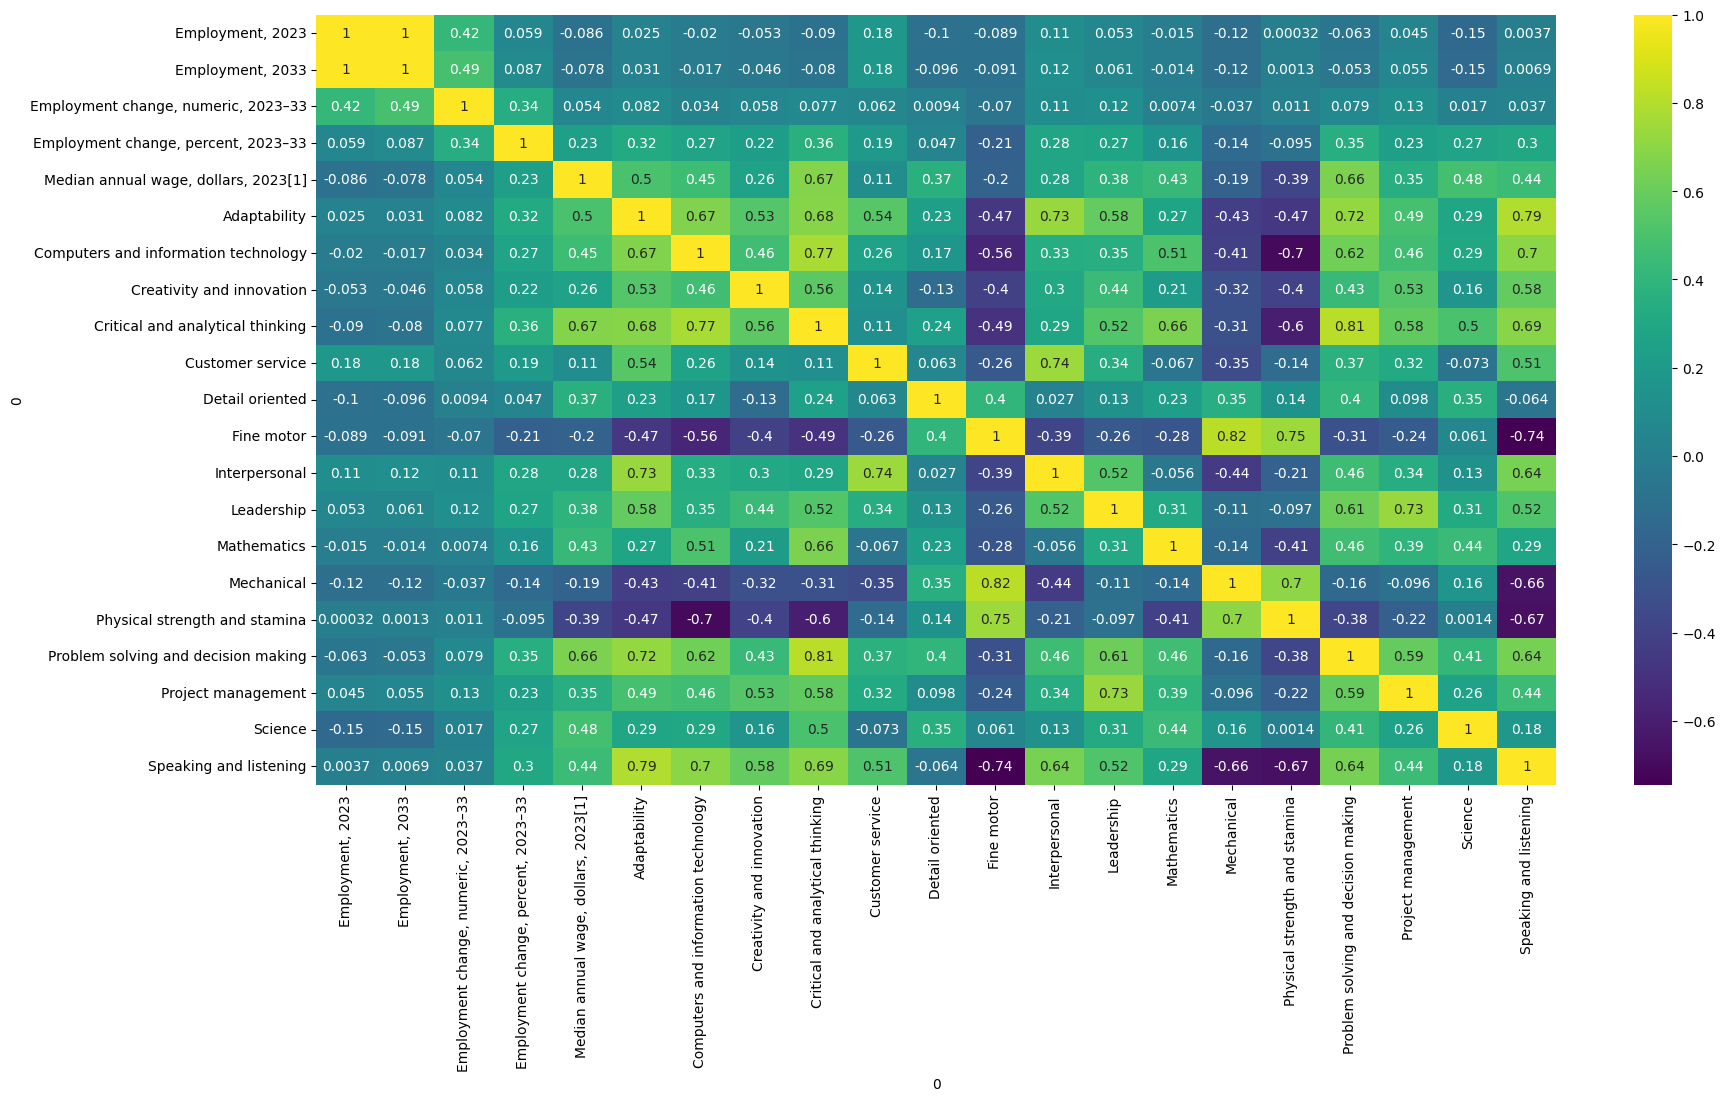

In [ ]:
corr_data = corr_plot.iloc[:,2:23].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_data, annot=True, cmap="viridis")


In [ ]:
threshold = 0.8
high_corr_pairs = []
for i in range(len(corr_data.columns)):
    for j in range(i):
        if abs(corr_data.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_data.columns[i], corr_data.columns[j], corr_data.iloc[i, j]))

print("Highly correlated feature pairs (r > 0.8):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: correlation = {pair[2]:.2f}")

if len(high_corr_pairs) > 0:
    feature_to_drop = high_corr_pairs[0][0]
    df = corr_plot.iloc[:,2:23].drop(columns=[feature_to_drop])
    print(f"\nDropped feature: {feature_to_drop}")

print("\nRemaining dataframe after dropping highly correlated feature:")
print(df.columns)

Highly correlated feature pairs (r > 0.8):
Employment, 2033 and Employment, 2023: correlation = 1.00
Mechanical and Fine motor: correlation = 0.82
Problem solving and decision making and Critical and analytical thinking: correlation = 0.81

Dropped feature: Employment, 2033

Remaining dataframe after dropping highly correlated feature:
Index(['Employment, 2023', 'Employment change, numeric, 2023–33',
       'Employment change, percent, 2023–33',
       'Median annual wage, dollars, 2023[1]', 'Adaptability',
       'Computers and information technology', 'Creativity and innovation',
       'Critical and analytical thinking', 'Customer service',
       'Detail oriented', 'Fine motor', 'Interpersonal', 'Leadership',
       'Mathematics', 'Mechanical', 'Physical strength and stamina',
       'Problem solving and decision making', 'Project management', 'Science',
       'Speaking and listening'],
      dtype='object', name=0)


<Axes: xlabel='0', ylabel='0'>

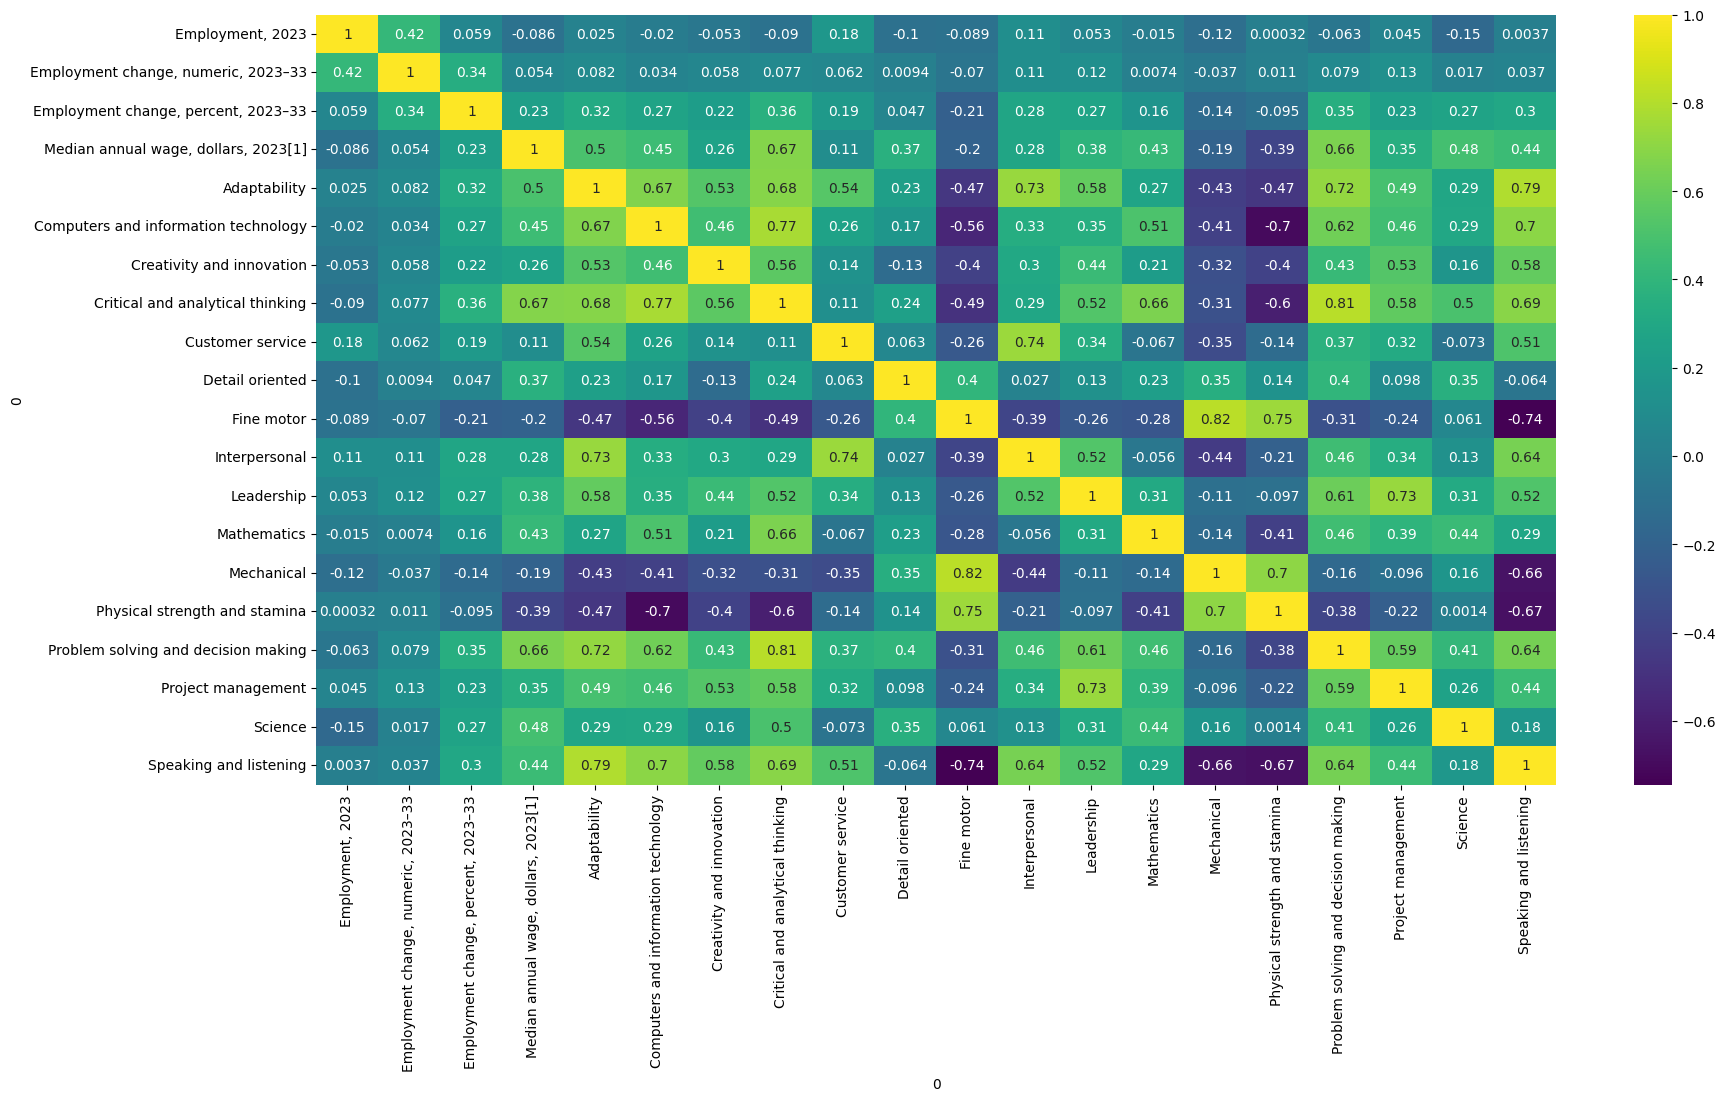

In [42]:
corr_data_rectified = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_data_rectified, annot=True, cmap="viridis")

In [43]:
# The Pearson correlation coefficient (r) is a measure of the linear relationship between two variables. It ranges from -1 to +1:

# +1: Perfect positive correlation.
# -1: Perfect negative correlation.
# 0: No linear correlation.
# 0.1 to 0.3: Weak correlation.
# 0.3 to 0.7: Moderate correlation.
# 0.7 to 1.0: Strong correlation.
# In practice:

# If the coefficient is close to +1, one variable increases as the other increases.
# If the coefficient is close to -1, one variable decreases as the other increases.
# If the coefficient is close to 0, there's no strong linear relationship between the two variables.

In [ ]:
# high correlation does not imply causality. 
# Correlation simply indicates a statistical association between two variables, but it doesn’t establish a cause-and-effect relationship
# Use dimensionality reduction techniques like Principal Component Analysis (PCA) -> to handle multi collinearity

In [45]:
df.columns

Index(['Employment, 2023', 'Employment change, numeric, 2023–33',
       'Employment change, percent, 2023–33',
       'Median annual wage, dollars, 2023[1]', 'Adaptability',
       'Computers and information technology', 'Creativity and innovation',
       'Critical and analytical thinking', 'Customer service',
       'Detail oriented', 'Fine motor', 'Interpersonal', 'Leadership',
       'Mathematics', 'Mechanical', 'Physical strength and stamina',
       'Problem solving and decision making', 'Project management', 'Science',
       'Speaking and listening'],
      dtype='object', name=0)

In [46]:
# Mechanical has 3 colxumns with values above 0.6
# Fine Motor has 3 columns with values above 0.6

# Problem solving and decision making has nearly 7 values above 0.6
# Critical and analytical thinking has nearly 8 values above 0.6

# removing the `Fine Motor` and `Critical and analytical thinking` columns
df = df.drop(columns = ['Fine motor','Critical and analytical thinking'],axis=1)


<Axes: xlabel='0', ylabel='0'>

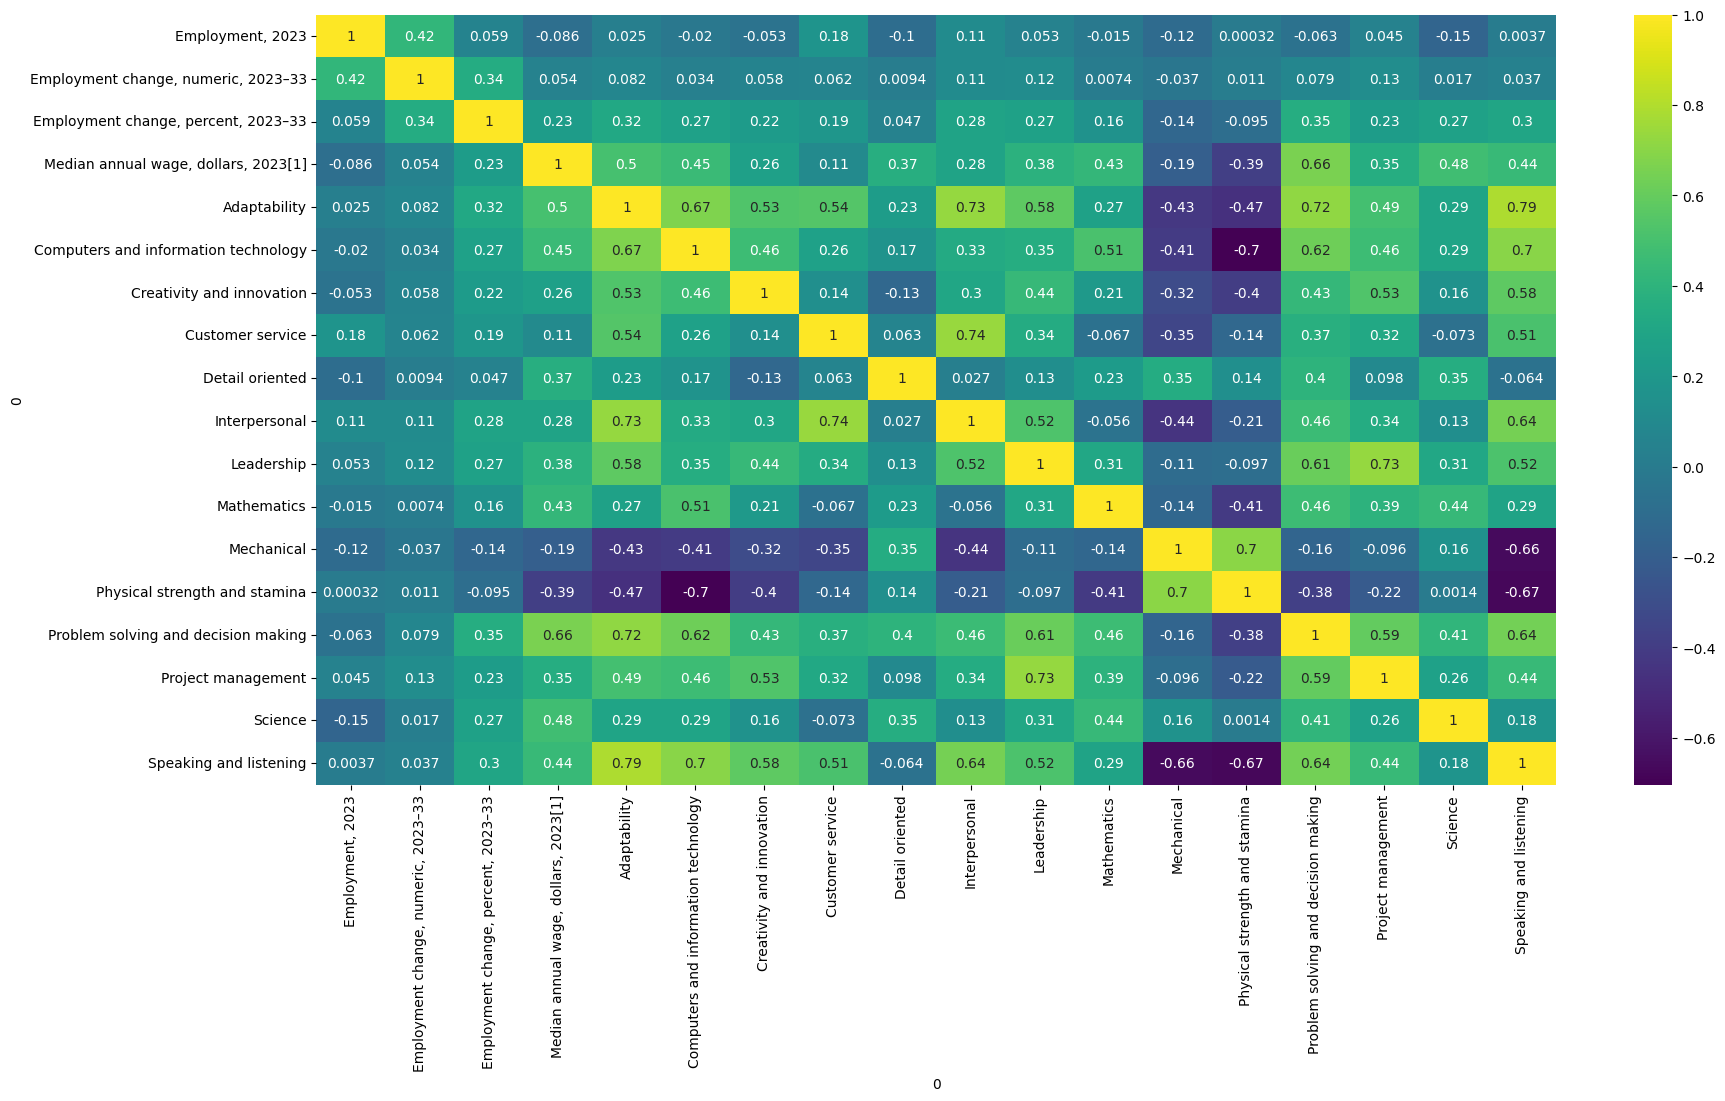

In [47]:
corr_data_rectified = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_data_rectified, annot=True, cmap="viridis")

In [48]:
df.columns

Index(['Employment, 2023', 'Employment change, numeric, 2023–33',
       'Employment change, percent, 2023–33',
       'Median annual wage, dollars, 2023[1]', 'Adaptability',
       'Computers and information technology', 'Creativity and innovation',
       'Customer service', 'Detail oriented', 'Interpersonal', 'Leadership',
       'Mathematics', 'Mechanical', 'Physical strength and stamina',
       'Problem solving and decision making', 'Project management', 'Science',
       'Speaking and listening'],
      dtype='object', name=0)

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [50]:
len(skills_sheet_dfs['Table 6.2'].columns)

25

In [51]:
numerical_cols = ['Employment, 2023',
       'Employment, 2033', 'Employment change, numeric, 2023–33',
       'Employment change, percent, 2023–33',
       'Median annual wage, dollars, 2023[1]','Adaptability',
       'Computers and information technology', 'Creativity and innovation',
       'Critical and analytical thinking', 'Customer service',
       'Detail oriented', 'Fine motor', 'Interpersonal', 'Leadership',
       'Mathematics', 'Mechanical', 'Physical strength and stamina',
       'Problem solving and decision making', 'Project management', 'Science',
       'Speaking and listening', 'Writing and reading']

In [52]:
skills_sheet_dfs['Table 6.2'][numerical_cols] = skills_sheet_dfs['Table 6.2'][numerical_cols].astype(float)

/var/folders/m6/39z99jrd3rq2vk51v5xvjkv80000gn/T/ipykernel_15907/3897855979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skills_sheet_dfs['Table 6.2'][numerical_cols] = skills_sheet_dfs['Table 6.2'][numerical_cols].astype(float)


In [53]:
skills_sheet_dfs['Table 6.2'].head()

,2023 National Employment Matrix title,2023 National Employment Matrix code,"Employment, 2023","Employment, 2033","Employment change, numeric, 2023–33","Employment change, percent, 2023–33","Median annual wage, dollars, 2023[1]",Typical education needed for entry,Adaptability,Computers and information technology,...,Interpersonal,Leadership,Mathematics,Mechanical,Physical strength and stamina,Problem solving and decision making,Project management,Science,Speaking and listening,Writing and reading
1,Chief executives,11-1011,313.9,331.1,17.2,5.5,206680.0,Bachelor's degree,4.2,3.7,...,4.0,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4.0,4.2
2,General and operations managers,11-1021,3630.1,3840.5,210.4,5.8,101280.0,Bachelor's degree,4.1,3.5,...,3.7,4.0,3.0,1.7,1.7,4.1,3.6,1.7,3.5,3.8
3,Legislators[2],11-1031,33.7,35.0,1.4,4.1,47290.0,Bachelor's degree,4.2,3.7,...,4.0,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4.0,4.2
4,Advertising and promotions managers,11-2011,22.2,21.7,-0.6,-2.6,131870.0,Bachelor's degree,4.0,3.6,...,3.5,3.2,3.0,1.3,1.3,3.8,3.1,1.4,3.9,3.7
5,Marketing managers,11-2021,389.1,420.8,31.7,8.2,157620.0,Bachelor's degree,4.0,3.6,...,3.5,3.8,3.1,1.1,1.3,4.0,3.3,1.3,3.8,3.7


In [54]:
skills_sheet_dfs['Table 6.2'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 1 to 832
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   2023 National Employment Matrix title  832 non-null    object 
 1   2023 National Employment Matrix code   832 non-null    object 
 2   Employment, 2023                       832 non-null    float64
 3   Employment, 2033                       832 non-null    float64
 4   Employment change, numeric, 2023–33    832 non-null    float64
 5   Employment change, percent, 2023–33    832 non-null    float64
 6   Median annual wage, dollars, 2023[1]   832 non-null    float64
 7   Typical education needed for entry     832 non-null    object 
 8   Adaptability                           832 non-null    float64
 9   Computers and information technology   832 non-null    float64
 10  Creativity and innovation              832 non-null    float64
 11  Critic

Numerical columns: ['Employment, 2023', 'Employment, 2033', 'Employment change, numeric, 2023–33', 'Employment change, percent, 2023–33', 'Median annual wage, dollars, 2023[1]', 'Adaptability', 'Computers and information technology', 'Creativity and innovation', 'Critical and analytical thinking', 'Customer service', 'Detail oriented', 'Fine motor', 'Interpersonal', 'Leadership', 'Mathematics', 'Mechanical', 'Physical strength and stamina', 'Problem solving and decision making', 'Project management', 'Science', 'Speaking and listening', 'Writing and reading']
Categorical columns: ['Typical education needed for entry']
Correlation between PCs and target variable:
PC1: -0.0980
PC2: -0.0493
PC3: 0.0154
PC4: 0.0561
PC5: -0.0884
PC6: 0.0333
PC7: 0.0233
PC8: -0.0337
PC9: 0.0536
PC10: 0.0541
PC11: -0.0306
PC12: 0.0342
PC13: 0.0249
PC14: -0.1076
PC15: 0.0351
                                                                                                                       precision    recal

/Users/keshavelango/Documents/GitHub/big-data-algo/labour-latest/LabourData/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/keshavelango/Documents/GitHub/big-data-algo/labour-latest/LabourData/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/keshavelango/Documents/GitHub/big-data-algo/labour-latest/LabourData/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

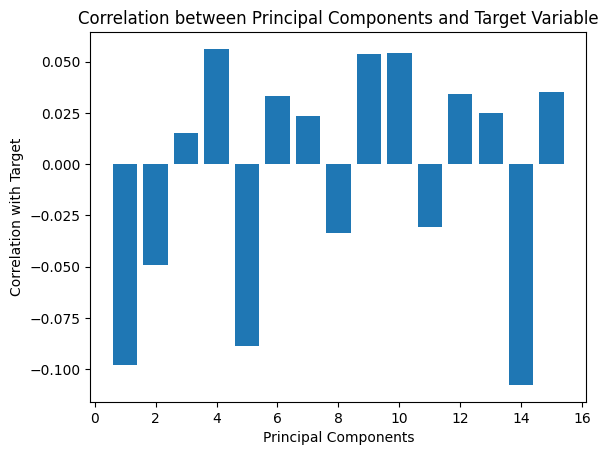

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

df = skills_sheet_dfs['Table 6.2'].drop("2023 National Employment Matrix code", axis=1)
df.columns = df.columns.str.strip()

X = df.drop('2023 National Employment Matrix title', axis=1)
y = df['2023 National Employment Matrix title']

numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ]
)

pca_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=15))
])

X_pca = pca_pipeline.fit_transform(X)

pca = pca_pipeline.named_steps['pca']
explained_variance_ratio = pca.explained_variance_ratio_

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

import numpy as np
pc_target_correlation = np.corrcoef(X_pca.T, y_encoded)  # Transpose X_pca to correlate with target
correlation_with_target = pc_target_correlation[:-1, -1]  # Get the correlation with the last row (target variable)
print("Correlation between PCs and target variable:")
for i, corr in enumerate(correlation_with_target):
    print(f'PC{i+1}: {corr:.4f}')

# Use Logistic Regression for a simple classification model
model = LogisticRegression(max_iter=10000)
model.fit(X_pca, y_encoded)

y_pred = model.predict(X_pca)
print(classification_report(y_encoded, y_pred, target_names=label_encoder.classes_))

import matplotlib.pyplot as plt
plt.bar(range(1, len(correlation_with_target) + 1), correlation_with_target)
plt.xlabel('Principal Components')
plt.ylabel('Correlation with Target')
plt.title('Correlation between Principal Components and Target Variable')
plt.show()


In [85]:
df.columns

Index(['2023 National Employment Matrix title', 'Employment, 2023',
       'Employment, 2033', 'Employment change, numeric, 2023–33',
       'Employment change, percent, 2023–33',
       'Median annual wage, dollars, 2023[1]',
       'Typical education needed for entry', 'Adaptability',
       'Computers and information technology', 'Creativity and innovation',
       'Critical and analytical thinking', 'Customer service',
       'Detail oriented', 'Fine motor', 'Interpersonal', 'Leadership',
       'Mathematics', 'Mechanical', 'Physical strength and stamina',
       'Problem solving and decision making', 'Project management', 'Science',
       'Speaking and listening', 'Writing and reading'],
      dtype='object', name=0)

Numerical columns: ['Median annual wage, dollars, 2023[1]', 'Adaptability', 'Computers and information technology', 'Creativity and innovation', 'Critical and analytical thinking', 'Customer service', 'Detail oriented', 'Fine motor', 'Interpersonal', 'Leadership', 'Mathematics', 'Mechanical', 'Physical strength and stamina', 'Problem solving and decision making', 'Project management', 'Science', 'Speaking and listening', 'Writing and reading']
Categorical columns: ['Typical education needed for entry']
Correlation between PCs and target variable:
PC1: -0.0976
PC2: -0.0430
PC3: 0.0615
PC4: -0.0959
PC5: 0.0409
PC6: -0.0221
PC7: 0.0212
PC8: -0.0388
PC9: 0.0420
PC10: 0.0083
PC11: 0.1199
PC12: 0.0181
PC13: -0.0486
PC14: -0.0005
PC15: 0.0523
                                                                                                                       precision    recall  f1-score   support

                                                                                             A

/Users/keshavelango/Documents/GitHub/big-data-algo/labour-latest/LabourData/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/keshavelango/Documents/GitHub/big-data-algo/labour-latest/LabourData/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/keshavelango/Documents/GitHub/big-data-algo/labour-latest/LabourData/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

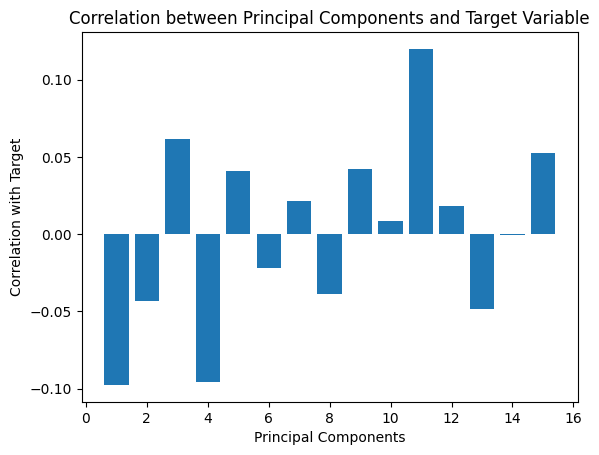

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

df = skills_sheet_dfs['Table 6.2'].drop(["2023 National Employment Matrix code",'Employment, 2023',
       'Employment, 2033', 'Employment change, numeric, 2023–33',
       'Employment change, percent, 2023–33'], axis=1)

df.columns = df.columns.str.strip()

X = df.drop('2023 National Employment Matrix title', axis=1)
y = df['2023 National Employment Matrix title']

numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ]
)

pca_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=15))
])

X_pca = pca_pipeline.fit_transform(X)

pca = pca_pipeline.named_steps['pca']
explained_variance_ratio = pca.explained_variance_ratio_

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

import numpy as np
pc_target_correlation = np.corrcoef(X_pca.T, y_encoded)  # Transpose X_pca to correlate with target
correlation_with_target = pc_target_correlation[:-1, -1]  # Get the correlation with the last row (target variable)
print("Correlation between PCs and target variable:")
for i, corr in enumerate(correlation_with_target):
    print(f'PC{i+1}: {corr:.4f}')

model = LogisticRegression(max_iter=10000)
model.fit(X_pca, y_encoded)

y_pred = model.predict(X_pca)
print(classification_report(y_encoded, y_pred, target_names=label_encoder.classes_))

import matplotlib.pyplot as plt
plt.bar(range(1, len(correlation_with_target) + 1), correlation_with_target)
plt.xlabel('Principal Components')
plt.ylabel('Correlation with Target')
plt.title('Correlation between Principal Components and Target Variable')
plt.show()


In [55]:
skills_sheet_dfs['Table 6.2'].columns

Index(['2023 National Employment Matrix title',
       '2023 National Employment Matrix code', 'Employment, 2023',
       'Employment, 2033', 'Employment change, numeric, 2023–33',
       'Employment change, percent, 2023–33',
       'Median annual wage, dollars, 2023[1]',
       'Typical education needed for entry', 'Adaptability',
       'Computers and information technology', 'Creativity and innovation',
       'Critical and analytical thinking', 'Customer service',
       'Detail oriented', 'Fine motor', 'Interpersonal', 'Leadership',
       'Mathematics', 'Mechanical', 'Physical strength and stamina',
       'Problem solving and decision making', 'Project management', 'Science',
       'Speaking and listening', 'Writing and reading'],
      dtype='object', name=0)

In [ ]:
df = skills_sheet_dfs['Table 6.2'].drop("2023 National Employment Matrix code", axis=1)
df.columns = df.columns.str.strip()

X = df.drop('2023 National Employment Matrix title', axis=1)
y = df['2023 National Employment Matrix title']

numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ]
)

pca_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=15))
])

X_pca = pca_pipeline.fit_transform(X)

pca = pca_pipeline.named_steps['pca']
explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_df = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio
})

print(explained_variance_df)

loadings = pca.components_ 
feature_names = numerical_cols + list(pca_pipeline.named_steps['preprocessor']\
                                      .transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_cols))  # Combine numerical and encoded categorical feature names

loadings_df = pd.DataFrame(loadings, columns=feature_names, index=[f'PC{i+1}' for i in range(loadings.shape[0])])


Numerical columns: ['Employment, 2023', 'Employment, 2033', 'Employment change, numeric, 2023–33', 'Employment change, percent, 2023–33', 'Median annual wage, dollars, 2023[1]', 'Adaptability', 'Computers and information technology', 'Creativity and innovation', 'Critical and analytical thinking', 'Customer service', 'Detail oriented', 'Fine motor', 'Interpersonal', 'Leadership', 'Mathematics', 'Mechanical', 'Physical strength and stamina', 'Problem solving and decision making', 'Project management', 'Science', 'Speaking and listening', 'Writing and reading']
Categorical columns: ['Typical education needed for entry']
   Component  Explained Variance Ratio
0        PC1                  0.378843
1        PC2                  0.129165
2        PC3                  0.104632
3        PC4                  0.078660
4        PC5                  0.052347
5        PC6                  0.045360
6        PC7                  0.030386
7        PC8                  0.027936
8        PC9           

In [57]:
# Display the loadings (contribution of each feature to each principal component)
loadings_df

,"Employment, 2023","Employment, 2033","Employment change, numeric, 2023–33","Employment change, percent, 2023–33","Median annual wage, dollars, 2023[1]",Adaptability,Computers and information technology,Creativity and innovation,Critical and analytical thinking,Customer service,...,Speaking and listening,Writing and reading,Typical education needed for entry_Associate's degree,Typical education needed for entry_Bachelor's degree,Typical education needed for entry_Doctoral or professional degree,Typical education needed for entry_High school diploma or equivalent,Typical education needed for entry_Master's degree,Typical education needed for entry_No formal educational credential,Typical education needed for entry_Postsecondary nondegree award,"Typical education needed for entry_Some college, no degree"
PC1,0.004096,0.007359,0.039068,0.137993,0.216692,0.291858,0.279570,0.213255,0.301480,0.148285,...,0.303552,0.315227,0.003847,0.066619,0.037780,-0.071170,0.017999,-0.052056,-0.003386,0.000368
PC2,-0.341270,-0.341661,-0.158608,0.000924,0.217477,-0.015841,0.030220,-0.025673,0.167662,-0.204202,...,-0.135185,0.011762,0.019475,-0.015497,0.023405,0.012048,-0.006414,-0.037542,0.009995,-0.005470
PC3,0.402299,0.417731,0.357714,0.187439,0.049985,0.082102,-0.094979,-0.064802,-0.030292,0.187649,...,-0.094720,-0.099707,-0.000566,-0.036229,-0.012137,0.030559,-0.011452,0.011878,0.020127,-0.002180
PC4,-0.293377,-0.303519,-0.248187,-0.038022,-0.094826,0.203805,-0.130266,0.024300,-0.181261,0.437790,...,0.118296,-0.080379,-0.006462,-0.084443,0.005213,0.057389,0.006048,0.006516,0.016969,-0.001230
PC5,-0.112123,-0.098490,0.104843,0.159929,-0.228983,-0.124137,-0.127413,0.467828,0.036201,-0.219225,...,-0.028822,-0.086448,-0.019031,0.072112,-0.045156,-0.035748,0.006220,0.034506,-0.010767,-0.002135
PC6,-0.219182,-0.177063,0.381408,0.700396,0.072788,-0.007333,-0.070228,-0.067514,-0.000895,-0.071181,...,0.019832,0.020062,0.014734,-0.014132,0.036511,-0.110212,0.031995,0.028420,0.018291,-0.005606
PC7,0.142422,0.103988,-0.374042,-0.049733,0.216123,-0.085218,-0.265675,-0.213232,-0.047654,-0.025799,...,0.024738,-0.031403,-0.010173,-0.042545,0.094607,-0.132938,0.013172,0.112116,-0.035439,0.001199
PC8,-0.075822,-0.083901,-0.126272,0.360360,-0.368080,-0.154355,0.131612,-0.457695,-0.031393,0.311090,...,-0.065168,-0.044414,0.022885,0.019890,-0.130405,0.116702,-0.006504,-0.008765,-0.008800,-0.005003
PC9,-0.191015,-0.148372,0.400090,-0.194513,0.472184,-0.166142,-0.308791,-0.331776,-0.019431,-0.025086,...,-0.053132,-0.075885,-0.069398,0.031499,0.047819,0.020878,-0.005986,0.057197,-0.065772,-0.016237
PC10,-0.168705,-0.115580,0.529662,-0.456051,-0.362075,0.090055,0.144227,-0.097006,-0.061952,0.016541,...,0.050044,0.082232,0.047946,-0.048188,-0.017649,0.109795,-0.008509,-0.086778,-0.000303,0.003685


In [58]:
# Combine the explained variance ratio with the loadings
combined_df = explained_variance_df.join(loadings_df, on="Component")
combined_df

,Component,Explained Variance Ratio,"Employment, 2023","Employment, 2033","Employment change, numeric, 2023–33","Employment change, percent, 2023–33","Median annual wage, dollars, 2023[1]",Adaptability,Computers and information technology,Creativity and innovation,...,Speaking and listening,Writing and reading,Typical education needed for entry_Associate's degree,Typical education needed for entry_Bachelor's degree,Typical education needed for entry_Doctoral or professional degree,Typical education needed for entry_High school diploma or equivalent,Typical education needed for entry_Master's degree,Typical education needed for entry_No formal educational credential,Typical education needed for entry_Postsecondary nondegree award,"Typical education needed for entry_Some college, no degree"
0,PC1,0.378843,0.004096,0.007359,0.039068,0.137993,0.216692,0.291858,0.279570,0.213255,...,0.303552,0.315227,0.003847,0.066619,0.037780,-0.071170,0.017999,-0.052056,-0.003386,0.000368
1,PC2,0.129165,-0.341270,-0.341661,-0.158608,0.000924,0.217477,-0.015841,0.030220,-0.025673,...,-0.135185,0.011762,0.019475,-0.015497,0.023405,0.012048,-0.006414,-0.037542,0.009995,-0.005470
2,PC3,0.104632,0.402299,0.417731,0.357714,0.187439,0.049985,0.082102,-0.094979,-0.064802,...,-0.094720,-0.099707,-0.000566,-0.036229,-0.012137,0.030559,-0.011452,0.011878,0.020127,-0.002180
3,PC4,0.078660,-0.293377,-0.303519,-0.248187,-0.038022,-0.094826,0.203805,-0.130266,0.024300,...,0.118296,-0.080379,-0.006462,-0.084443,0.005213,0.057389,0.006048,0.006516,0.016969,-0.001230
4,PC5,0.052347,-0.112123,-0.098490,0.104843,0.159929,-0.228983,-0.124137,-0.127413,0.467828,...,-0.028822,-0.086448,-0.019031,0.072112,-0.045156,-0.035748,0.006220,0.034506,-0.010767,-0.002135
5,PC6,0.045360,-0.219182,-0.177063,0.381408,0.700396,0.072788,-0.007333,-0.070228,-0.067514,...,0.019832,0.020062,0.014734,-0.014132,0.036511,-0.110212,0.031995,0.028420,0.018291,-0.005606
6,PC7,0.030386,0.142422,0.103988,-0.374042,-0.049733,0.216123,-0.085218,-0.265675,-0.213232,...,0.024738,-0.031403,-0.010173,-0.042545,0.094607,-0.132938,0.013172,0.112116,-0.035439,0.001199
7,PC8,0.027936,-0.075822,-0.083901,-0.126272,0.360360,-0.368080,-0.154355,0.131612,-0.457695,...,-0.065168,-0.044414,0.022885,0.019890,-0.130405,0.116702,-0.006504,-0.008765,-0.008800,-0.005003
8,PC9,0.024655,-0.191015,-0.148372,0.400090,-0.194513,0.472184,-0.166142,-0.308791,-0.331776,...,-0.053132,-0.075885,-0.069398,0.031499,0.047819,0.020878,-0.005986,0.057197,-0.065772,-0.016237
9,PC10,0.020396,-0.168705,-0.115580,0.529662,-0.456051,-0.362075,0.090055,0.144227,-0.097006,...,0.050044,0.082232,0.047946,-0.048188,-0.017649,0.109795,-0.008509,-0.086778,-0.000303,0.003685


Correlation between PCs and target variable:
PC1: -0.0980
PC2: -0.0493
PC3: 0.0154
PC4: 0.0561
PC5: -0.0884
PC6: 0.0333
PC7: 0.0233
PC8: -0.0337
PC9: 0.0536
PC10: 0.0541
PC11: -0.0306
PC12: 0.0342
PC13: 0.0249
PC14: -0.1076
PC15: 0.0351
                                                                                                                       precision    recall  f1-score   support

                                                                                             Accountants and auditors       1.00      1.00      1.00         1
                                                                                                               Actors       1.00      1.00      1.00         1
                                                                                                            Actuaries       1.00      1.00      1.00         1
                                                                                                       Acupuncturists       1.

/Users/keshavelango/Documents/GitHub/big-data-algo/labour-latest/LabourData/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/keshavelango/Documents/GitHub/big-data-algo/labour-latest/LabourData/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/keshavelango/Documents/GitHub/big-data-algo/labour-latest/LabourData/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

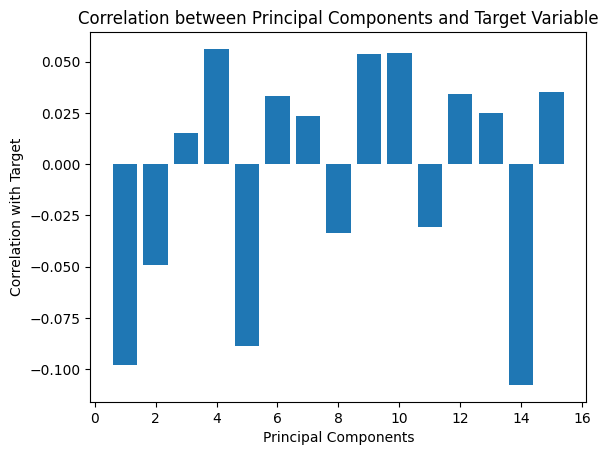

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 2: Get the principal components (X_pca from previous code)
# (Note: X_pca is already computed after applying PCA in the pipeline)

# Step 3: Correlation between PCs and target
# We can compute the correlation between each principal component and the target variable (encoded)

# Option 1: Pearson correlation (for continuous targets, not always applicable for categorical targets)
# Correlation matrix between the PCs and target
import numpy as np
pc_target_correlation = np.corrcoef(X_pca.T, y_encoded)  # Transpose X_pca to correlate with target
correlation_with_target = pc_target_correlation[:-1, -1]  # Get the correlation with the last row (target variable)
print("Correlation between PCs and target variable:")
for i, corr in enumerate(correlation_with_target):
    print(f'PC{i+1}: {corr:.4f}')

# Step 4: Train a classification model to assess how well the PCs explain the target variable
# Use Logistic Regression for a simple classification model
model = LogisticRegression(max_iter=10000)
model.fit(X_pca, y_encoded)

# Print out the classification report (accuracy, precision, recall, F1-score, etc.)
y_pred = model.predict(X_pca)
print(classification_report(y_encoded, y_pred, target_names=label_encoder.classes_))

# Optional: If you want to visualize the importance of the PCs in predicting the target variable
import matplotlib.pyplot as plt
plt.bar(range(1, len(correlation_with_target) + 1), correlation_with_target)
plt.xlabel('Principal Components')
plt.ylabel('Correlation with Target')
plt.title('Correlation between Principal Components and Target Variable')
plt.show()


In [82]:
print(classification_report(y_encoded, y_pred, target_names=label_encoder.classes_))

                                                                                                                       precision    recall  f1-score   support

                                                                                             Accountants and auditors       1.00      1.00      1.00         1
                                                                                                               Actors       1.00      1.00      1.00         1
                                                                                                            Actuaries       1.00      1.00      1.00         1
                                                                                                       Acupuncturists       1.00      1.00      1.00         1
                                                                       Adhesive bonding machine operators and tenders       1.00      1.00      1.00         1
                                             

/Users/keshavelango/Documents/GitHub/big-data-algo/labour-latest/LabourData/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/keshavelango/Documents/GitHub/big-data-algo/labour-latest/LabourData/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/keshavelango/Documents/GitHub/big-data-algo/labour-latest/LabourData/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

In [ ]:
import numpy as np

X_transformed = pca_pipeline.named_steps['preprocessor'].transform(X)

# Step 3: Apply SVD to the preprocessed data matrix
# Note: The PCA transformation effectively applies SVD on the data
U, Sigma, VT = np.linalg.svd(X_transformed, full_matrices=False)

Sigma_matrix = np.diag(Sigma)

U_df = pd.DataFrame(U, columns=[f'U{i+1}' for i in range(U.shape[1])])
Sigma_df = pd.DataFrame(Sigma_matrix, columns=[f'Sigma{i+1}' for i in range(Sigma_matrix.shape[1])])
VT_df = pd.DataFrame(VT, columns=[f'V{i+1}' for i in range(VT.shape[1])])

print("U (Left Singular Vectors):")
print(U_df.shape)

print("\nSigma (Singular Values as Diagonal Matrix):")
print(Sigma_df.shape)

print("\nV^T (Right Singular Vectors):")
print(VT_df.shape)


U (Left Singular Vectors):
(832, 30)

Sigma (Singular Values as Diagonal Matrix):
(30, 30)

V^T (Right Singular Vectors):
(30, 30)


In [59]:
combined_df.columns

Index(['Component', 'Explained Variance Ratio', 'Employment, 2023',
       'Employment, 2033', 'Employment change, numeric, 2023–33',
       'Employment change, percent, 2023–33',
       'Median annual wage, dollars, 2023[1]', 'Adaptability',
       'Computers and information technology', 'Creativity and innovation',
       'Critical and analytical thinking', 'Customer service',
       'Detail oriented', 'Fine motor', 'Interpersonal', 'Leadership',
       'Mathematics', 'Mechanical', 'Physical strength and stamina',
       'Problem solving and decision making', 'Project management', 'Science',
       'Speaking and listening', 'Writing and reading',
       'Typical education needed for entry_Associate's degree',
       'Typical education needed for entry_Bachelor's degree',
       'Typical education needed for entry_Doctoral or professional degree',
       'Typical education needed for entry_High school diploma or equivalent',
       'Typical education needed for entry_Master's degree',

In [60]:
feature_names

['Employment, 2023',
 'Employment, 2033',
 'Employment change, numeric, 2023–33',
 'Employment change, percent, 2023–33',
 'Median annual wage, dollars, 2023[1]',
 'Adaptability',
 'Computers and information technology',
 'Creativity and innovation',
 'Critical and analytical thinking',
 'Customer service',
 'Detail oriented',
 'Fine motor',
 'Interpersonal',
 'Leadership',
 'Mathematics',
 'Mechanical',
 'Physical strength and stamina',
 'Problem solving and decision making',
 'Project management',
 'Science',
 'Speaking and listening',
 'Writing and reading',
 "Typical education needed for entry_Associate's degree",
 "Typical education needed for entry_Bachelor's degree",
 'Typical education needed for entry_Doctoral or professional degree',
 'Typical education needed for entry_High school diploma or equivalent',
 "Typical education needed for entry_Master's degree",
 'Typical education needed for entry_No formal educational credential',
 'Typical education needed for entry_Postsecon

In [61]:
explained_variance_df['Cumulative Variance'] = explained_variance_df['Explained Variance Ratio'].cumsum()
explained_variance_df


,Component,Explained Variance Ratio,Cumulative Variance
0,PC1,0.378843,0.378843
1,PC2,0.129165,0.508008
2,PC3,0.104632,0.612640
3,PC4,0.078660,0.691300
4,PC5,0.052347,0.743648
5,PC6,0.045360,0.789007
6,PC7,0.030386,0.819394
7,PC8,0.027936,0.847329
8,PC9,0.024655,0.871984
9,PC10,0.020396,0.892379


<Axes: xlabel='Component'>

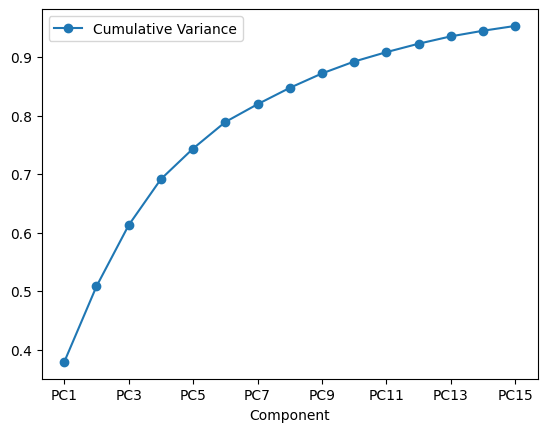

In [ ]:
explained_variance_df['Cumulative Variance'] = explained_variance_df['Explained Variance Ratio'].cumsum()
explained_variance_df.plot(x='Component', y='Cumulative Variance', kind='line', marker='o')

In [63]:
# Get the number of components that explain 80% of the variance
n_components_to_keep = explained_variance_df[explained_variance_df['Cumulative Variance'] <= 0.80].shape[0]
print(f"Number of components to keep: {n_components_to_keep}")


Number of components to keep: 6


In [64]:
# Find features with low absolute loadings (e.g., absolute value < 0.1 in all components)
low_loading_threshold = 0.1
features_to_drop = [feature for feature in feature_names if (abs(loadings_df[feature]) < low_loading_threshold).all()]
print("Features to drop:", features_to_drop)


Features to drop: ["Typical education needed for entry_Associate's degree", "Typical education needed for entry_Master's degree", 'Typical education needed for entry_Some college, no degree']


In [66]:
explained_variance_df[explained_variance_df['Cumulative Variance'] <= 0.80]

,Component,Explained Variance Ratio,Cumulative Variance
0,PC1,0.378843,0.378843
1,PC2,0.129165,0.508008
2,PC3,0.104632,0.612640
3,PC4,0.078660,0.691300
4,PC5,0.052347,0.743648
5,PC6,0.045360,0.789007


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Create a DataFrame with the principal components and encoded target variable
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['target'] = y_encoded

correlations = pca_df.corr()['target'].drop('target')
print(correlations)


PC1    -0.098018
PC2    -0.049333
PC3     0.015405
PC4     0.056138
PC5    -0.088413
PC6     0.033286
PC7     0.023344
PC8    -0.033704
PC9     0.053621
PC10    0.054066
PC11   -0.030644
PC12    0.034220
PC13    0.024894
PC14   -0.107581
PC15    0.035056
Name: target, dtype: float64


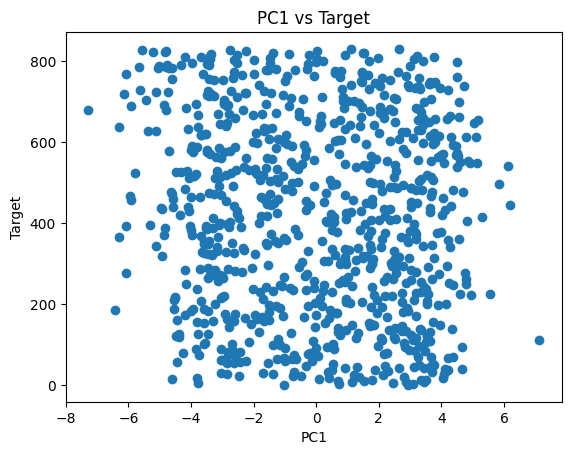

In [70]:
# Scatter plot of the first principal component vs the target
plt.scatter(pca_df['PC1'], pca_df['target'])
plt.xlabel('PC1')
plt.ylabel('Target')
plt.title('PC1 vs Target')
plt.show()


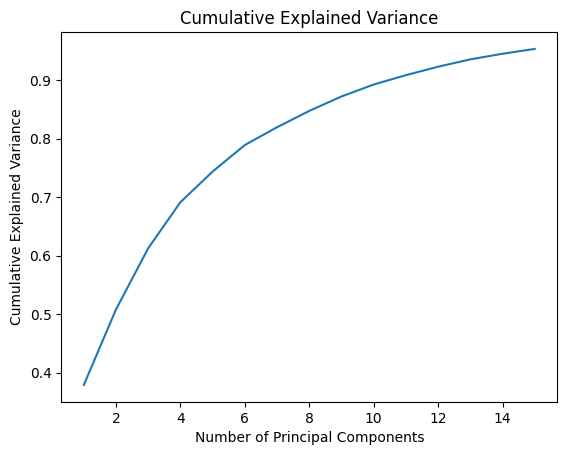

Keep 10 components for 90% variance explained.


In [72]:
# Plot the explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

# Choose components that explain 90% of the variance
n_components_to_keep = (cumulative_variance <= 0.90).sum()
print(f"Keep {n_components_to_keep} components for 90% variance explained.")


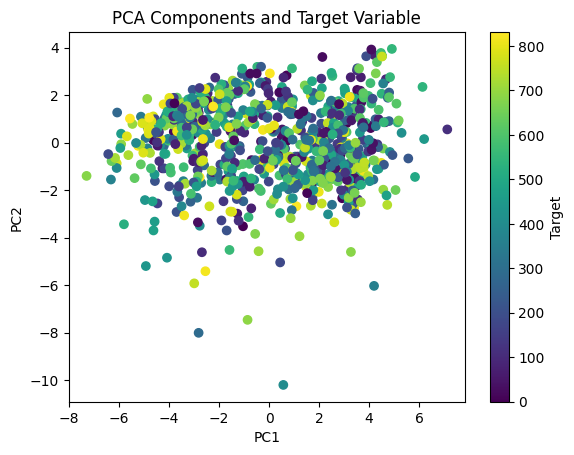

In [73]:
# Plot the first two principal components
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['target'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Components and Target Variable')
plt.colorbar(label='Target')
plt.show()


In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import numpy as np

numerical_cols = [
    'Median annual wage, dollars, 2023[1]', 'Adaptability',
    'Computers and information technology', 'Creativity and innovation',
    'Critical and analytical thinking', 'Customer service',
    'Detail oriented', 'Fine motor', 'Interpersonal', 'Leadership',
    'Mathematics', 'Mechanical', 'Physical strength and stamina',
    'Problem solving and decision making', 'Project management', 'Science',
    'Speaking and listening', 'Writing and reading'
]

categorical_cols = ['Typical education needed for entry']

user_inputs = {}
widgets_dict = {}

def get_widget_layout(feature):
    # Adjust the width based on the length of the feature name, but cap at a maximum value
    width = min(800, 20 + len(feature) * 10)
    return widgets.Layout(width=f'{width}px', height='30px')

label_layout = widgets.Layout(width='auto', height='30px')  # auto-width for labels to adjust dynamically

for feature in numerical_cols:
    widgets_dict[feature] = widgets.FloatText(layout=get_widget_layout(feature))

for feature in categorical_cols:
    widgets_dict[feature] = widgets.Text(layout=get_widget_layout(feature))

X_new = None

def get_user_input():
    global X_new
    for feature, widget in widgets_dict.items():
        user_inputs[feature] = widget.value
        
    X_new = pd.DataFrame([user_inputs])
    # print("\nCollected Data:")
    # print(X_new)

submit_button = widgets.Button(description="Submit")

def on_submit(b):
    get_user_input()

    if X_new is not None:
        # Step 2: Preprocess the new data using the existing PCA pipeline
        X_new_pca = pca_pipeline.transform(X_new)

        # Step 3: Get the predicted probabilities using the trained Logistic Regression model
        y_new_pred_prob = model.predict_proba(X_new_pca)

        # Step 4: Sort the predictions by probability and get top 10 predictions
        top_10_indices = np.argsort(y_new_pred_prob[0])[::-1][:10]  # Sort probabilities and get the top 10 indices

        # Step 5: Convert the top 10 predicted numeric labels back to original categorical labels
        top_10_labels = label_encoder.inverse_transform(top_10_indices)

        # Step 6: Display the top 10 predictions and their probabilities
        print("\nTop 10 predicted target labels for the new data:")
        for idx, label in enumerate(top_10_labels):
            print(f"{idx + 1}: {label} (Probability: {y_new_pred_prob[0][top_10_indices[idx]]:.4f})")

submit_button.on_click(on_submit)

display_widgets = []
for feature, widget in widgets_dict.items():
    # Combine the label and input widget into a horizontal box (side by side)
    display_widgets.append(widgets.HBox([widgets.Label(value=feature, layout=label_layout), widget]))

display(widgets.VBox(display_widgets))

display(submit_button)

print("Waiting for user input...")


Button(description='Submit', style=ButtonStyle())

Waiting for user input...



Top 10 predicted target labels for the new data:
1:   Chefs and head cooks (Probability: 0.3512)
2:   First-line supervisors of landscaping, lawn service, and groundskeeping workers (Probability: 0.0905)
3:   Photographers (Probability: 0.0688)
4:   Manufactured building and mobile home installers (Probability: 0.0443)
5:   Farmers, ranchers, and other agricultural managers (Probability: 0.0401)
6:   Locksmiths and safe repairers (Probability: 0.0229)
7:   First-line supervisors of mechanics, installers, and repairers (Probability: 0.0179)
8:   Audiovisual equipment installers and repairers (Probability: 0.0154)
9:   Helpers--electricians (Probability: 0.0151)
10:   Farm and home management educators (Probability: 0.0138)
